# <center> Environment Project</center>
#### <center> João Rodrigues 102487  &  Guilherme Casal 102587 </center>
### <center> Analysis of environment data </center>

- _Link for GitHub Project_: https://github.com/GuilhermeCasal/DataManagementFCD 

In this work we will analyze various types of data related to pollution. We will try to obtain some conclusions, try to answer some question. To achieve this, the data will need treatment like nulls filling ,  outliers removal. In order to delevop this results, visualizing and observing the data will be key. 

For this project we are using the libraries _pandas_ for data management,  _seaborn_  and _matplotlib_for data visualization, _geopy_ to calculate distances between different locations and _skitlearn_ for the application of Machine Learning models

In [67]:
import pandas as pd
from sklearn.impute import KNNImputer
import seaborn as sns
from geopy.distance import geodesic
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

The data that we used was :  
- _Air Quality_ : It's a data-set from the city of London with the principal componentes of the air, which defines the quality of it. The data consists in  a mean of all days and it's grouped by month. Can be found at:  https://data.london.gov.uk/dataset

- _Pollution_ : This data-set contains the quantity of pollutant gases emited to the air per year. Many countries are included there.  
Can be found at:  https://www.eea.europa.eu/en/datahub/datahubitem-view/9405f714-8015-4b5b-a63c-280b82861b3d  

- _Traffic flow_ : Here we can find the traffic flow from different regions of London per year, distinguished for the  different roads of it.  
Can be found at: https://roadtraffic.dft.gov.uk/regions/6  

- _Health index_ : The last set of data represents the health index. Instead of of having a single index, it contains  one for each area . For exemaple, if one region has a lot of people that do exercise the health index will be postive in that area.  
Can be found at: https://www.ons.gov.uk/peoplepopulationandcommunity/healthandsocialcare/healthandwellbeing/datasets/healthindexunderlyingdataengland

### The first step is to load and filtrate the data for a area of 50 km of radius around the city of London

In [68]:
#Loading of the data

#air quality file
data_air = pd.read_csv("datasets/air-quality-london-monthly-averages.csv")

#pollution file
data_pol = pd.read_csv("datasets/pollution.csv",low_memory=False)

#traffic flow file
data_traf = pd.read_csv("datasets/dft_aadf_region_id_6.csv")

#health index file
data_health = pd.read_csv("datasets/healthindexunderlyingdataenglandcanscreenfix.csv",delimiter=";")

#### Before the filtering the data, we must visualize it on a table format to see all the variables and how their values are disposed 

The air and traffic flow data-set just includes the London city, thus there's no need to aplly this first filtering

In [69]:
data_air.head()

Month  London Mean Roadside:Nitric Oxide (ug/m3)  \
0  Jan-08                                        NaN   
1  Feb-08                                        NaN   
2  Mar-08                                        NaN   
3  Apr-08                                        NaN   
4  May-08                                        NaN   

   London Mean Roadside:Nitrogen Dioxide (ug/m3)  \
0                                           55.5   
1                                           75.9   
2                                           55.6   
3                                           61.8   
4                                           62.9   

   London Mean Roadside:Oxides of Nitrogen (ug/m3)  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                              NaN   
4                                              NaN   

   London Mean Roadside:Ozone (ug/m3)  \
0                                29.5   
1                                20.3   
2                                40.1   
3                                37.9   
4                                46.3   

   London Mean Roadside:PM10 Particulate (ug/m3)  \
0                                           25.0   
1                                           39.5   
2                                           21.6   
3                                           28.7   
4                                           34.6   

   London Mean Roadside:PM2.5 Particulate (ug/m3)  \
0                                            14.7   
1                                            28.8   
2                                            12.3   
3                                            20.5   
4                                            27.5   

   London Mean Roadside:Sulphur Dioxide (ug/m3)  \
0                                           4.2   
1                                           7.6   
2                                           3.9   
3                                           4.5   
4                                           4.6   

   London Mean Background:Nitric Oxide (ug/m3)  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

   London Mean Background:Nitrogen Dioxide (ug/m3)  \
0                                             42.3   
1                                             60.2   
2                                             39.8   
3                                             44.0   
4                                             44.1   

   London Mean Background:Oxides of Nitrogen (ug/m3)  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

   London Mean Background:Ozone (ug/m3)  \
0                                  36.9   
1                                  26.4   
2                                  50.2   
3                                  50.1   
4                                  60.5   

   London Mean Background:PM10 Particulate (ug/m3)  \
0                                             18.8   
1                                             31.9   
2                                             15.5   
3                                             21.7   
4                                             29.5   

  London Mean Background:PM2.5 Particulate (ug/m3)  \
0                                                .   
1                                                .   
2                                                .   
3                                                .   
4                         

In [70]:
data_traf.head()

count_point_id  year  region_id region_name  local_authority_id  \
0            6750  2014          6      London                  96   
1            8352  2014          6      London                 104   
2            6807  2014          6      London                 178   
3           27765  2014          6      London                  57   
4            8488  2014          6      London                 104   

   local_authority_name road_name road_type start_junction_road_name  \
0             Islington      A201     Major               Swinton St   
1              Lewisham        A2     Major                      A20   
2  Kingston upon Thames      A240     Major                    A3210   
3                Barnet     A5109     Major              Barnet Lane   
4              Lewisham       A20     Major          A20 Amersham Rd   

  end_junction_road_name  ...  buses_and_coaches  lgvs  hgvs_2_rigid_axle  \
0         Pentonville Rd  ...                787  1728                204   
1                    A20  ...                430  1415                258   
2                   A307  ...                175  1589                251   
3             A1000/A109  ...                302  1651                246   
4        A2 Parkfield Rd  ...                656  1617                286   

   hgvs_3_rigid_axle  hgvs_4_or_more_rigid_axle  hgvs_3_or_4_articulated_axle  \
0                 74                        132                            15   
1                 36                         58                             6   
2                 35                         13                             2   
3                 12                         12                             0   
4                 83                         27                             5   

  hgvs_5_articulated_axle hgvs_6_articulated_axle  all_hgvs  \
0                       6                      18       449   
1                      11                      22       390   
2                       4                      19       325   
3                       1                       1       273   
4                       8                       7       415   

   all_motor_vehicles  
0               11916  
1                9426  
2               12951  
3               19276  
4               12821  

[5 rows x 31 columns]

In [71]:
data_pol.head()

countryName  EPRTRSectorCode                           eprtrSectorName  \
0     Austria              4.0                         Chemical industry   
1     Austria              9.0                          Other activities   
2     Austria              6.0  Paper and wood production and processing   
3     Austria              6.0  Paper and wood production and processing   
4     Austria              3.0                          Mineral industry   

  EPRTRAnnexIMainActivityCode  \
0                        4(d)   
1                        9(c)   
2                        6(b)   
3                        6(b)   
4                        3(c)   

                        EPRTRAnnexIMainActivityLabel  \
0  Chemical installations for the production on a...   
1  Installations for the surface treatment of sub...   
2  Industrial plants for the production of paper ...   
3  Industrial plants for the production of paper ...   
4  Installations for the production of cement cli...   

                FacilityInspireID                          facilityName  \
0  AT.CAED/9008390392737.FACILITY                   Nufarm GmbH & CO KG   
1  AT.CAED/9008390396414.FACILITY  MAGNA STEYR Fahrzeugtechnik AG&Co KG   
2  AT.CAED/9008390397176.FACILITY             Fritz EGGER GmbH & Co. OG   
3  AT.CAED/9008390397176.FACILITY             Fritz EGGER GmbH & Co. OG   
4  AT.CAED/9008390397220.FACILITY                voestalpine Stahl GmbH   

  facilityNameConfidentialityReason  Longitude   Latitude  \
0                               NaN  14.336056  48.290943   
1                               NaN  15.477778  47.019170   
2                               NaN  15.691833  48.259556   
3                               NaN  15.691833  48.259556   
4                               NaN  14.159778  47.807083   

  addressConfidentialityReason                    City targetRelease  \
0                          NaN                    Linz           AIR   
1                          NaN   Graz,07.Bez.:Liebenau           AIR   
2                          NaN           Unterradlberg           AIR   
3                          NaN           Unterradlberg           AIR   
4                          NaN  Klaus an der Pyhrnbahn           AIR   

                                        pollutant    emissions  reportingYear  \
0                    1,2-dichloroethane (DCE-1,2)       3300.0           2007   
1  Non-methane volatile organic compounds (NMVOC)     170000.0           2007   
2                            Carbon dioxide (CO2)  228000000.0           2007   
3                           Nitrogen oxides (NOX)     311000.0           2007   
4                            Carbon dioxide (CO2)  329000000.0           2007   

  releasesConfidentialityReason  
0                           NaN  
1                           NaN  
2                           NaN  
3                           NaN  
4                           NaN

### Filtering cities

For the datasets that contain several cities in the United Kingdom, we created a function to find out all the cities contained in the dataset in question within a radius of 50 kilometers based on latitude and longitude.
This is because we think it is important to bring together cities closer together as they will certainly be the most impactful in terms of pollution.

In [72]:
def citiesWithinRadius(cities,radius,data_cities,data_from_outside=True):
    lat_lon_london = (51.509865, -0.118092)
    cidades = []
    #iterate all cities around london
    for city in cities:
        cidade = city
        #check if the data countains coordinates information or not and take the row with city iterated
        if data_from_outside:
            city = data_cities[data_cities["city"]== city]
        else:
            city = data_cities[data_cities["City"]== city]

        try:
            #take the corrdinates
            if data_from_outside:
                loc = (pd.array(city["lat"])[0],pd.array(city["lng"])[0])
            else:
                loc = (pd.array(city["Latitude"])[0],pd.array(city["Longitude"])[0])
        except:
            continue
        #if the distance is lower than 50, append to the list
        distance = geodesic(lat_lon_london, loc).kilometers
        if distance<=50:
            cidades.append(cidade)
    return cidades

Filtering of pollution data-set

In [73]:
#just Uk country
data_cities = data_pol[data_pol["countryName"]=="United Kingdom"]
#return all cities within a radius of 50 km from London
city_50km = citiesWithinRadius(data_health["Area name"].unique(), 50, data_cities,False)
#select the cities around london
data_pol = data_pol[data_pol["City"].isin(city_50km)]
data_pol.head()


countryName  EPRTRSectorCode                  eprtrSectorName  \
289510  United Kingdom              5.0  Waste and wastewater management   
289511  United Kingdom              5.0  Waste and wastewater management   
289512  United Kingdom              5.0  Waste and wastewater management   
289806  United Kingdom              3.0                 Mineral industry   
289807  United Kingdom              3.0                 Mineral industry   

       EPRTRAnnexIMainActivityCode  \
289510                        5(d)   
289511                        5(d)   
289512                        5(d)   
289806                        3(e)   
289807                        3(e)   

                             EPRTRAnnexIMainActivityLabel  \
289510  Landfills (excluding landfills of inert waste ...   
289511  Landfills (excluding landfills of inert waste ...   
289512  Landfills (excluding landfills of inert waste ...   
289806  Installations for the manufacture of glass, in...   
289807  Installations for the manufacture of glass, in...   

            FacilityInspireID  \
289510  GB.EEA/13495.FACILITY   
289511  GB.EEA/13495.FACILITY   
289512  GB.EEA/13495.FACILITY   
289806  GB.EEA/31898.FACILITY   
289807  GB.EEA/31898.FACILITY   

                                             facilityName  \
289510  Viridor Waste Management Ltd, Beddington Farml...   
289511  Viridor Waste Management Ltd, Beddington Farml...   
289512  Viridor Waste Management Ltd, Beddington Farml...   
289806                               O-I Manufacturing UK   
289807                               O-I Manufacturing UK   

       facilityNameConfidentialityReason  Longitude   Latitude  \
289510                               NaN  -0.142952  51.389667   
289511                               NaN  -0.142952  51.389667   
289512                               NaN  -0.142952  51.389667   
289806                               NaN   0.110430  51.783016   
289807                               NaN   0.110430  51.783016   

       addressConfidentialityReason    City targetRelease  \
289510                          NaN  Sutton           AIR   
289511                          NaN  Sutton           AIR   
289512                          NaN  Sutton           AIR   
289806                          NaN  Harlow           AIR   
289807                          NaN  Harlow           AIR   

                               pollutant  emissions  reportingYear  \
289510        Chlorofluorocarbons (CFCs)      11.10           2007   
289511  Hydrochlorofluorocarbons (HCFCs)       4.88           2007   
289512                     Methane (CH4)  117000.00           2007   
289806     Arsenic and compounds (as As)      35.00           2007   
289807             Nitrogen oxides (NOX)  446000.00           2007   

       releasesConfidentialityReason  
289510                           NaN  
289511                           NaN  
289512                           NaN  
289806                           NaN  
289807                           NaN

In [74]:
data_health.head()


Area code             Area name        Value Numerator Denominator  \
0  E06000001            Hartlepool  62,68947549       NaN         NaN   
1  E06000002         Middlesbrough   62,8371136       NaN         NaN   
2  E06000003  Redcar and Cleveland  65,80605787       NaN         NaN   
3  E06000004      Stockton-on-Tees  59,83048525       NaN         NaN   
4  E06000005            Darlington  65,39884288       NaN         NaN   

      Indicator name  Year  
0  Physical activity  2015  
1  Physical activity  2015  
2  Physical activity  2015  
3  Physical activity  2015  
4  Physical activity  2015

The data-set of the cities with their locations was found in : https://simplemaps.com/data/world-cities

Filtering of health index data-set

In [75]:
#information of the cities coordinates
data_cities = pd.read_csv("datasets/worldcities.csv")
data_cities = data_cities[data_cities["country"]=="United Kingdom"]
city_50km = citiesWithinRadius(data_health["Area name"].unique(), 50, data_cities)
data_health = data_health[data_health["Area name"].isin(city_50km)]
data_health.head()

Area code   Area name        Value Numerator Denominator  \
29  E06000032       Luton  61,75566862       NaN         NaN   
36  E06000039      Slough  59,60549999       NaN         NaN   
90  E07000066    Basildon   65,4596393       NaN         NaN   
92  E07000068   Brentwood  68,62717127       NaN         NaN   
94  E07000070  Chelmsford  67,26048083       NaN         NaN   

       Indicator name  Year  
29  Physical activity  2015  
36  Physical activity  2015  
90  Physical activity  2015  
92  Physical activity  2015  
94  Physical activity  2015

### Not every variable is relevant to the analysis,thus some of them will be excluded  
Also, there will be a modification in the name of the columns, to simpler ones and a re-indexing, where the dates will be the "primary key", so, in the future, we are allowed to merge with other data-sets

Air quality is determined by the presence and concentration of various air pollutant, from those who influence air quality the most, three will be selected to the analysis.  
The components chosen have in consideration studies made in paper "Megacities and Atmospheric Pollution" from Mario J. Molina and Luisa T. Molina


In [76]:
data_air.head()

Month  London Mean Roadside:Nitric Oxide (ug/m3)  \
0  Jan-08                                        NaN   
1  Feb-08                                        NaN   
2  Mar-08                                        NaN   
3  Apr-08                                        NaN   
4  May-08                                        NaN   

   London Mean Roadside:Nitrogen Dioxide (ug/m3)  \
0                                           55.5   
1                                           75.9   
2                                           55.6   
3                                           61.8   
4                                           62.9   

   London Mean Roadside:Oxides of Nitrogen (ug/m3)  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                              NaN   
4                                              NaN   

   London Mean Roadside:Ozone (ug/m3)  \
0                                29.5   
1                                20.3   
2                                40.1   
3                                37.9   
4                                46.3   

   London Mean Roadside:PM10 Particulate (ug/m3)  \
0                                           25.0   
1                                           39.5   
2                                           21.6   
3                                           28.7   
4                                           34.6   

   London Mean Roadside:PM2.5 Particulate (ug/m3)  \
0                                            14.7   
1                                            28.8   
2                                            12.3   
3                                            20.5   
4                                            27.5   

   London Mean Roadside:Sulphur Dioxide (ug/m3)  \
0                                           4.2   
1                                           7.6   
2                                           3.9   
3                                           4.5   
4                                           4.6   

   London Mean Background:Nitric Oxide (ug/m3)  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

   London Mean Background:Nitrogen Dioxide (ug/m3)  \
0                                             42.3   
1                                             60.2   
2                                             39.8   
3                                             44.0   
4                                             44.1   

   London Mean Background:Oxides of Nitrogen (ug/m3)  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

   London Mean Background:Ozone (ug/m3)  \
0                                  36.9   
1                                  26.4   
2                                  50.2   
3                                  50.1   
4                                  60.5   

   London Mean Background:PM10 Particulate (ug/m3)  \
0                                             18.8   
1                                             31.9   
2                                             15.5   
3                                             21.7   
4                                             29.5   

  London Mean Background:PM2.5 Particulate (ug/m3)  \
0                                                .   
1                                                .   
2                                                .   
3                                                .   
4                         

In [77]:
data_air.drop(["London Mean Roadside:Nitric Oxide (ug/m3)","London Mean Background:Nitric Oxide (ug/m3)",
               "London Mean Roadside:Oxides of Nitrogen (ug/m3)", "London Mean Background:Oxides of Nitrogen (ug/m3)"
               ],axis=1,inplace=True)
data_air.rename(columns={"London Mean Roadside:Nitrogen Dioxide (ug/m3)":"NO2 Air",
                         "London Mean Roadside:PM10 Particulate (ug/m3)":"PM10 Air",
                        "London Mean Roadside:PM2.5 Particulate (ug/m3)":"PM25",
                        "London Mean Roadside:Sulphur Dioxide (ug/m3)":"SO2 Air",
                        "London Mean Roadside:Ozone (ug/m3)" : "O3",
                        "London Mean Background:Nitrogen Dioxide (ug/m3)":"bg NO2",
                         "London Mean Background:PM10 Particulate (ug/m3)":"bg PM10",
                        "London Mean Background:PM2.5 Particulate (ug/m3)":"bg PM25",
                        "London Mean Background:Sulphur Dioxide (ug/m3)":"bg SO2",
                        "London Mean Background:Ozone (ug/m3)" : "bg O3",
                         },inplace=True)

data_air = data_air.loc[:,["Month","NO2 Air","PM10 Air","SO2 Air"]]

data_air.head()


Month  NO2 Air  PM10 Air  SO2 Air
0  Jan-08     55.5      25.0      4.2
1  Feb-08     75.9      39.5      7.6
2  Mar-08     55.6      21.6      3.9
3  Apr-08     61.8      28.7      4.5
4  May-08     62.9      34.6      4.6

In pollution data-set, the only relevant variables will be pollutant,the number of emissions, date, the city and the sector the emited the pollutant.  
In order to observe the evolution of each pulltant for each year, they will be tranformed to collums with pivot method


In [78]:
data_pol.head()

countryName  EPRTRSectorCode                  eprtrSectorName  \
289510  United Kingdom              5.0  Waste and wastewater management   
289511  United Kingdom              5.0  Waste and wastewater management   
289512  United Kingdom              5.0  Waste and wastewater management   
289806  United Kingdom              3.0                 Mineral industry   
289807  United Kingdom              3.0                 Mineral industry   

       EPRTRAnnexIMainActivityCode  \
289510                        5(d)   
289511                        5(d)   
289512                        5(d)   
289806                        3(e)   
289807                        3(e)   

                             EPRTRAnnexIMainActivityLabel  \
289510  Landfills (excluding landfills of inert waste ...   
289511  Landfills (excluding landfills of inert waste ...   
289512  Landfills (excluding landfills of inert waste ...   
289806  Installations for the manufacture of glass, in...   
289807  Installations for the manufacture of glass, in...   

            FacilityInspireID  \
289510  GB.EEA/13495.FACILITY   
289511  GB.EEA/13495.FACILITY   
289512  GB.EEA/13495.FACILITY   
289806  GB.EEA/31898.FACILITY   
289807  GB.EEA/31898.FACILITY   

                                             facilityName  \
289510  Viridor Waste Management Ltd, Beddington Farml...   
289511  Viridor Waste Management Ltd, Beddington Farml...   
289512  Viridor Waste Management Ltd, Beddington Farml...   
289806                               O-I Manufacturing UK   
289807                               O-I Manufacturing UK   

       facilityNameConfidentialityReason  Longitude   Latitude  \
289510                               NaN  -0.142952  51.389667   
289511                               NaN  -0.142952  51.389667   
289512                               NaN  -0.142952  51.389667   
289806                               NaN   0.110430  51.783016   
289807                               NaN   0.110430  51.783016   

       addressConfidentialityReason    City targetRelease  \
289510                          NaN  Sutton           AIR   
289511                          NaN  Sutton           AIR   
289512                          NaN  Sutton           AIR   
289806                          NaN  Harlow           AIR   
289807                          NaN  Harlow           AIR   

                               pollutant  emissions  reportingYear  \
289510        Chlorofluorocarbons (CFCs)      11.10           2007   
289511  Hydrochlorofluorocarbons (HCFCs)       4.88           2007   
289512                     Methane (CH4)  117000.00           2007   
289806     Arsenic and compounds (as As)      35.00           2007   
289807             Nitrogen oxides (NOX)  446000.00           2007   

       releasesConfidentialityReason  
289510                           NaN  
289511                           NaN  
289512                           NaN  
289806                           NaN  
289807                           NaN

In [79]:
data_pol = data_pol[["pollutant","emissions","reportingYear"]]
data_pol.rename(columns={"reportingYear":"Year"},inplace=True)
data_pol = data_pol.groupby(["Year","pollutant"])["emissions"].mean().reset_index().rename(columns={"emissions":"emissions"})
data_pol = data_pol.pivot(index='Year', columns='pollutant', values='emissions')
data_pol.head()

pollutant  Ammonia (NH3)  Arsenic and compounds (as As)  Carbon dioxide (CO2)  \
Year                                                                            
2007                 NaN                           35.0          1.960000e+09   
2008                 NaN                           28.0          2.120000e+09   
2009             51400.0                            NaN          2.050000e+09   
2010             35200.0                            NaN          1.030000e+09   
2011             32700.0                           37.7          1.960000e+09   

pollutant  Carbon dioxide (CO2) excluding biomass  Chlordecone  \
Year                                                             
2007                                          NaN          NaN   
2008                                          NaN          NaN   
2009                                          NaN          NaN   
2010                                          NaN          NaN   
2011                                          NaN         4.23   

pollutant  Chlorine and inorganic compounds (as HCl)  \
Year                                                   
2007                                             NaN   
2008                                             NaN   
2009                                             NaN   
2010                                             NaN   
2011                                         11300.0   

pollutant  Chlorofluorocarbons (CFCs)  Chromium and compounds (as Cr)  Halons  \
Year                                                                            
2007                             11.1                             NaN     NaN   
2008                             11.8                             NaN     NaN   
2009                             24.7                             NaN    2.36   
2010                             13.5                             NaN     NaN   
2011                            208.0                             NaN     NaN   

pollutant  Hydro-fluorocarbons (HFCS)  Hydrochlorofluorocarbons (HCFCs)  \
Year                                                                      
2007                              NaN                              4.88   
2008                              NaN                              6.34   
2009                              NaN                             14.40   
2010                              NaN                              5.20   
2011                              NaN                             53.30   

pollutant  Lead and compounds (as Pb)  Methane (CH4)  Nitrogen oxides (NOX)  \
Year                                                                          
2007                              NaN       130000.0               670500.0   
2008                              NaN       173500.0               791500.0   
2009                              NaN       262500.0               823000.0   
2010                            218.0       159000.0               496500.0   
2011                              NaN      1184000.0              1007500.0   

pollutant  Nitrous oxide (N2O)  \
Year                             
2007                       NaN   
2008                       NaN   
2009                       NaN   
2010                       NaN   
2011                       NaN   

pollutant  Non-methane volatile organic compounds (NMVOC)  \
Year                                                        
2007                                                  NaN   
2008                                                  NaN   
2009                                             750000.0   
2010                                                  NaN   
2011                                                  NaN   

pollutant  Polycyclic aromatic hydrocarbons (PAHs)  Sulphur oxides (SOX)  \
Year                                                                       
2007                                           NaN              247000.0   
2008                             

We chose only a few pollutants because we had a lot of NaN values, that is, we chose based on the main pollutants that had the most impact on health and those that had the most values
Even so, we had some Nan Values and we decided to use a scatter matrix to see if we had some pollutants with similar values so that we could create a linear regression to fill in the values, but we still realized that it was not possible.

' '

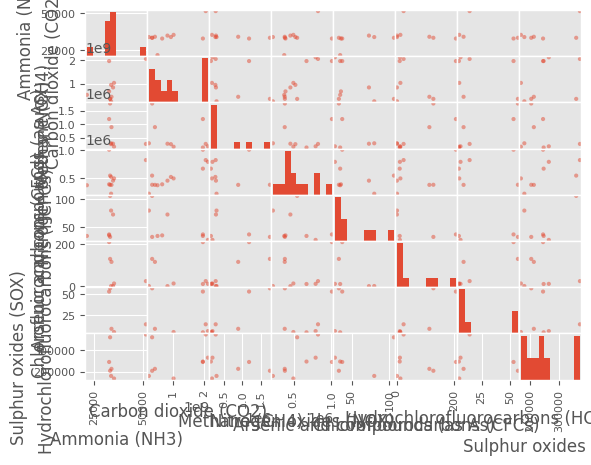

In [80]:
data_pol = data_pol.loc[:, ["Ammonia (NH3)", "Carbon dioxide (CO2)",
                             "Methane (CH4)", "Nitrogen oxides (NOX)", "Arsenic and compounds (as As)", "Chlorofluorocarbons (CFCs)", "Hydrochlorofluorocarbons (HCFCs)", "Sulphur oxides (SOX)"]]
scatter_matrix(data_pol)
" "

Then we filter by the most relevant components emited to the atmosphere, according to the paper referenced before,  and fill them with the K-Nearest Neighbors

In [81]:
data_pol = data_pol.loc[:, ["Ammonia (NH3)", "Sulphur oxides (SOX)",
                            "Methane (CH4)", "Nitrogen oxides (NOX)"]]

data_pol

pollutant  Ammonia (NH3)  Sulphur oxides (SOX)  Methane (CH4)  \
Year                                                            
2007                 NaN              247000.0       130000.0   
2008                 NaN              265000.0       173500.0   
2009             51400.0              373000.0       262500.0   
2010             35200.0              168000.0       159000.0   
2011             32700.0              245000.0      1184000.0   
2012             33900.0              213000.0       884000.0   
2013             33200.0              204000.0      1760000.0   
2014             33200.0              360000.0            NaN   
2015             33700.0              180000.0       286000.0   
2016             34700.0                   NaN       270000.0   
2017             33700.0                   NaN       254000.0   
2018             32700.0                   NaN            NaN   
2019             21400.0                   NaN            NaN   

pollutant  Nitrogen oxides (NOX)  
Year                              
2007                6.705000e+05  
2008                7.915000e+05  
2009                8.230000e+05  
2010                4.965000e+05  
2011                1.007500e+06  
2012                3.820000e+05  
2013                3.836667e+05  
2014                5.466667e+05  
2015                2.250000e+05  
2016                4.570000e+05  
2017                5.230000e+05  
2018                3.920000e+05  
2019                3.755000e+05

The K-Nearest Neighbors (KNN) imputation works by finding the K nearest data points to the sample with missing values and imputing the missing values based on these nearby points. 

In [82]:
# Reset the index of merged_df
def knn(data):
    index = data.index
    data.reset_index(drop=True, inplace=True)
    imputer = KNNImputer(n_neighbors=2)

    # Fill missing values using KNN
    merged_df = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

    merged_df = merged_df.set_index(index)
    return merged_df


data_pol = knn(data_pol)
data_pol


pollutant  Ammonia (NH3)  Sulphur oxides (SOX)  Methane (CH4)  \
Year                                                            
2007             34200.0              247000.0       130000.0   
2008             43300.0              265000.0       173500.0   
2009             51400.0              373000.0       262500.0   
2010             35200.0              168000.0       159000.0   
2011             32700.0              245000.0      1184000.0   
2012             33900.0              213000.0       884000.0   
2013             33200.0              204000.0      1760000.0   
2014             33200.0              360000.0       262000.0   
2015             33700.0              180000.0       286000.0   
2016             34700.0              264000.0       270000.0   
2017             33700.0              264000.0       254000.0   
2018             32700.0              208500.0      1322000.0   
2019             21400.0              208500.0      1322000.0   

pollutant  Nitrogen oxides (NOX)  
Year                              
2007                6.705000e+05  
2008                7.915000e+05  
2009                8.230000e+05  
2010                4.965000e+05  
2011                1.007500e+06  
2012                3.820000e+05  
2013                3.836667e+05  
2014                5.466667e+05  
2015                2.250000e+05  
2016                4.570000e+05  
2017                5.230000e+05  
2018                3.920000e+05  
2019                3.755000e+05

For this analysis we won't consider the flow in the different roads, thus the only variable related to that,  will be "all_motor_vehicles" which includes the sum of all road flows

In [83]:
data_traf.head()

count_point_id  year  region_id region_name  local_authority_id  \
0            6750  2014          6      London                  96   
1            8352  2014          6      London                 104   
2            6807  2014          6      London                 178   
3           27765  2014          6      London                  57   
4            8488  2014          6      London                 104   

   local_authority_name road_name road_type start_junction_road_name  \
0             Islington      A201     Major               Swinton St   
1              Lewisham        A2     Major                      A20   
2  Kingston upon Thames      A240     Major                    A3210   
3                Barnet     A5109     Major              Barnet Lane   
4              Lewisham       A20     Major          A20 Amersham Rd   

  end_junction_road_name  ...  buses_and_coaches  lgvs  hgvs_2_rigid_axle  \
0         Pentonville Rd  ...                787  1728                204   
1                    A20  ...                430  1415                258   
2                   A307  ...                175  1589                251   
3             A1000/A109  ...                302  1651                246   
4        A2 Parkfield Rd  ...                656  1617                286   

   hgvs_3_rigid_axle  hgvs_4_or_more_rigid_axle  hgvs_3_or_4_articulated_axle  \
0                 74                        132                            15   
1                 36                         58                             6   
2                 35                         13                             2   
3                 12                         12                             0   
4                 83                         27                             5   

  hgvs_5_articulated_axle hgvs_6_articulated_axle  all_hgvs  \
0                       6                      18       449   
1                      11                      22       390   
2                       4                      19       325   
3                       1                       1       273   
4                       8                       7       415   

   all_motor_vehicles  
0               11916  
1                9426  
2               12951  
3               19276  
4               12821  

[5 rows x 31 columns]

There will be only one value for each year, that corresponds to the sum of all regions of London selected previously

In [84]:
data_traf = data_traf[["year","local_authority_name","all_motor_vehicles"]]
data_traf = data_traf.groupby('year')['all_motor_vehicles'].sum().reset_index()

data_traf =data_traf.set_index(["year"])
data_traf.head()

all_motor_vehicles
year                    
2000            55572506
2001            55553417
2002            54356983
2003            55230556
2004            54561589

From the health index data-set will only be withdrawn, related to health, the value and the Indicator name(area which the index is being applied), since the numerator and denominator are only used to obtain the variable "value".

In [85]:
data_health["Indicator name"].unique()

array(['Physical activity', 'Air pollution', 'Alcohol misuse',
       'Mortality from all causes', 'Avoidable mortality',
       'Cancer screening attendance', 'Cancer', 'Child poverty',
       'Drug misuse', 'Low-level crime', 'Personal crime',
       'Cardiovascular conditions', 'Dementia', 'Diabetes', 'Disability',
       'Distance to GP services', 'Distance to pharmacies',
       'Distance to sports or leisure facilities', 'Healthy eating',
       'Noise complaints', 'Early years development', 'Frailty',
       'Patients offered acceptable GP practice appointments',
       'High blood pressure', 'Household overcrowding',
       'Young people in education, employment and apprenticeships',
       'Sedentary behaviour', 'Infant mortality', 'Internet access',
       'Kidney and liver disease', 'Pupil attainment', 'Life expectancy',
       'Low birth weight', 'Mental health conditions',
       'Musculoskeletal conditions', 'Overweight and obesity in adults',
       'Overweight and obesi

Just a few health factors will be selected. They are the ones we think have more correlation to pollution. They will also be now collumns of the data-set, so that we can have a row for each year
  

In [86]:
data_health = data_health[["Area name","Value","Indicator name","Year"]].copy()
data_health['Value'] = data_health['Value'].str.replace(',', '.')
data_health["Value"] = data_health["Value"].astype(float)
data_health = data_health.groupby(["Year", "Indicator name"])["Value"].mean().reset_index().rename(columns={"Value":"Value"})
data_health = data_health.pivot(index='Year', columns='Indicator name', values='Value')
data_health= data_health.loc[:,["Air pollution", "Cancer", "Respiratory conditions"]]
data_health


Indicator name  Air pollution    Cancer  Respiratory conditions
Year                                                           
2015                10.435721  3.222155               10.976621
2016                11.451568  3.222155               10.976621
2017                11.480882  3.222155               10.976621
2018                11.457786  3.222155               10.976621
2019                11.196704  3.412539               11.165615
2020                 8.854768  3.384097               11.290680
2021                 8.221743  3.088371               11.663465

We had values for all months of each year we decided to make an average per year.

In [87]:
data_air["Month"] = pd.to_datetime(data_air["Month"], format='%b-%y').dt.year
data_air.rename(columns={"Month":"Year"}, inplace=True)
data_air = data_air.set_index("Year")
data_air = data_air.groupby("Year").mean()
data_air.head()


NO2 Air   PM10 Air   SO2 Air
Year                                
2008  57.016667  26.391667  4.066667
2009  58.333333  25.808333  3.491667
2010  58.633333  25.433333  3.933333
2011  55.866667  27.641667  2.883333
2012  60.069231  26.669231  3.000000

In the code below we verify NaN values for all datasets

In [88]:
health_NaN = data_health.isna().any()
health_NaN

Indicator name
Air pollution             False
Cancer                    False
Respiratory conditions    False
dtype: bool

In [89]:
air_NaN = data_air.isna().any()
air_NaN

NO2 Air     False
PM10 Air    False
SO2 Air     False
dtype: bool

In [90]:
pol_NaN = data_pol.isna().any()
pol_NaN

pollutant
Ammonia (NH3)            False
Sulphur oxides (SOX)     False
Methane (CH4)            False
Nitrogen oxides (NOX)    False
dtype: bool

In [91]:
traf_NaN = data_traf.isna().any()
traf_NaN

all_motor_vehicles    False
dtype: bool

### Plot some data


The points that the boxplot mark as outliers, dont seem like noisy data. Those points are just a slight deviation from the usual pattern, which is normal for envrionmental data, because this one is having some drastic changes in the last years ,so they will not be removed.


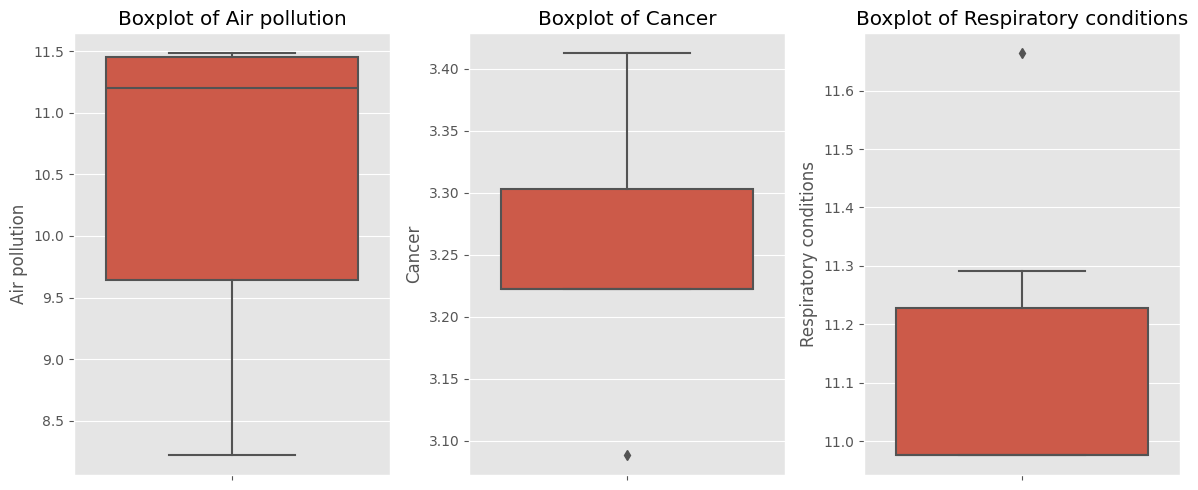

In [92]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
for i, col in enumerate(data_health.columns):
    sns.boxplot(y=data_health[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Adjusting layout and displaying the figure
plt.tight_layout()
plt.show()

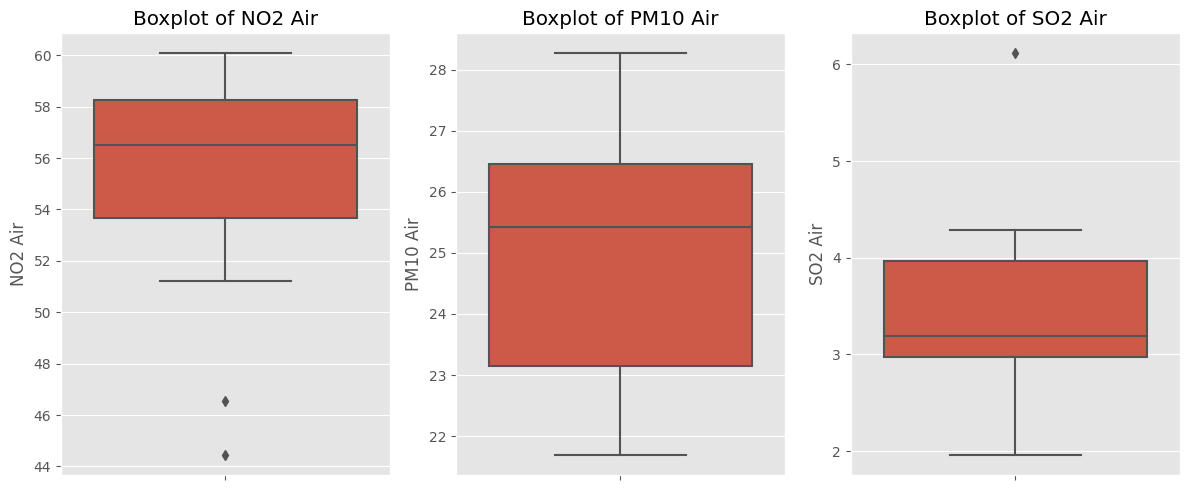

In [93]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
for i, col in enumerate(data_air.columns):
    sns.boxplot(y=data_air[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Adjusting layout and displaying the figure
plt.tight_layout()
plt.show()

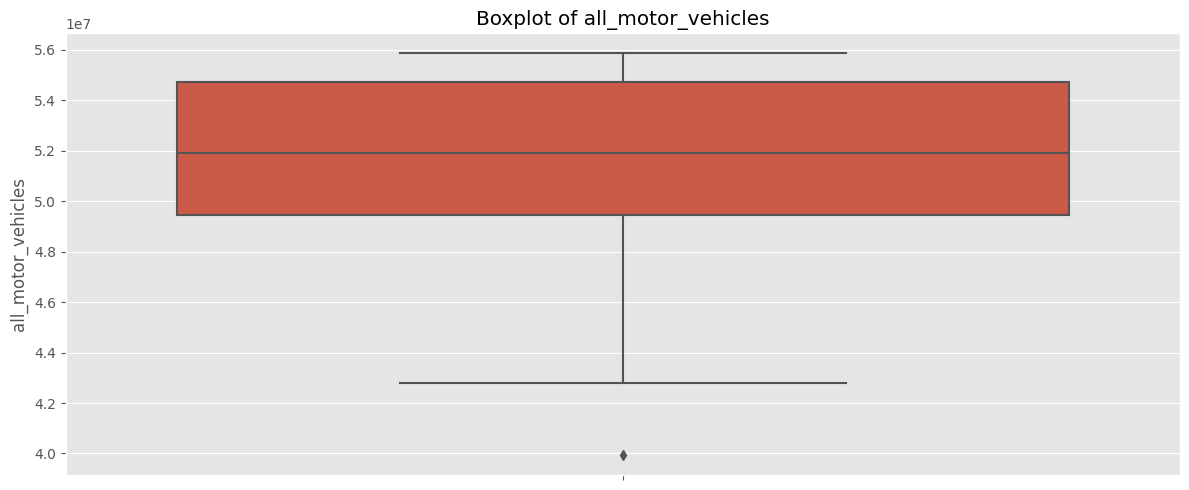

In [94]:
fig, axes = plt.subplots(1, 1, figsize=(12, 5))
for i, col in enumerate(data_traf.columns):
    sns.boxplot(y=data_traf[col], ax=axes)
    axes.set_title(f'Boxplot of {col}')

# Adjusting layout and displaying the figure
plt.tight_layout()
plt.show()

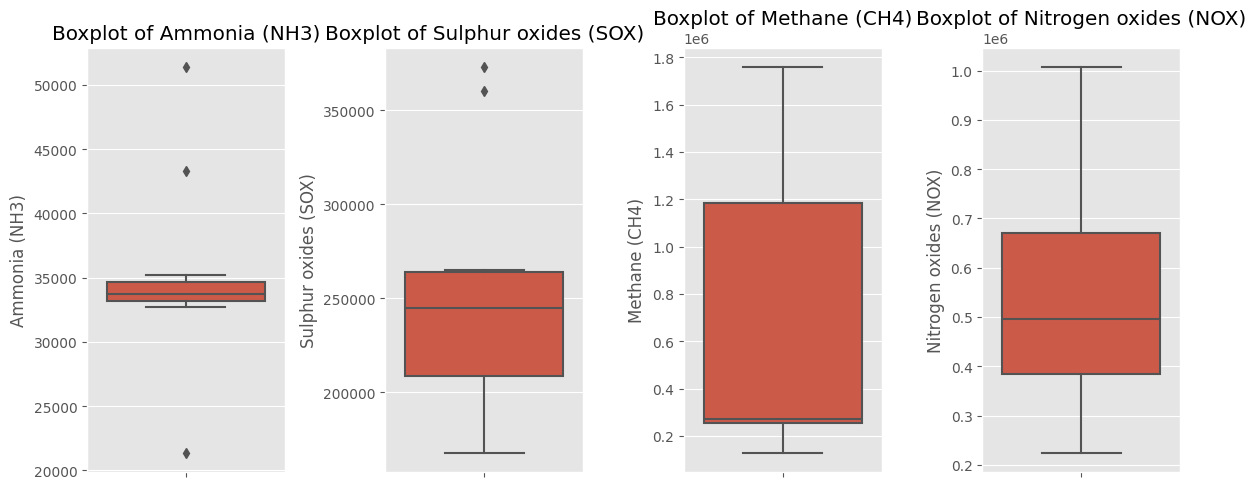

In [95]:
fig, axes = plt.subplots(1, 4, figsize=(12, 5))
for i, col in enumerate(data_pol.columns):
    sns.boxplot(y=data_pol[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Adjusting layout and displaying the figure
plt.tight_layout()
plt.show()

### Merge Datasets 

Now all data will be merged, so that it can be analysed more easily in the future

In [96]:
merged_df = data_traf.join(data_air,how="outer")
merged_df = merged_df.join(data_health,how="outer")
merged_df = merged_df.join(data_pol,how="outer")
merged_df.head(20)

all_motor_vehicles    NO2 Air   PM10 Air   SO2 Air  Air pollution  \
2000            55572506        NaN        NaN       NaN            NaN   
2001            55553417        NaN        NaN       NaN            NaN   
2002            54356983        NaN        NaN       NaN            NaN   
2003            55230556        NaN        NaN       NaN            NaN   
2004            54561589        NaN        NaN       NaN            NaN   
2005            54435671        NaN        NaN       NaN            NaN   
2006            55846934        NaN        NaN       NaN            NaN   
2007            54834530        NaN        NaN       NaN            NaN   
2008            55040271  57.016667  26.391667  4.066667            NaN   
2009            54216130  58.333333  25.808333  3.491667            NaN   
2010            51921676  58.633333  25.433333  3.933333            NaN   
2011            50247234  55.866667  27.641667  2.883333            NaN   
2012            48965709  60.069231  26.669231  3.000000            NaN   
2013            49059691  58.218182  28.263636  3.190909            NaN   
2014            49510592  56.675000  25.425000  3.058333            NaN   
2015            49450382  54.466667  23.725000  2.891667      10.435721   
2016            49472094  56.375000  23.208333  4.283333      11.451568   
2017            49833281  51.233333  21.691667  3.191667      11.480882   
2018            51555695  46.550000  22.208333  1.958333      11.457786   
2019            52646698  44.442857  22.942857  6.114286      11.196704   

        Cancer  Respiratory conditions  Ammonia (NH3)  Sulphur oxides (SOX)  \
2000       NaN                     NaN            NaN                   NaN   
2001       NaN                     NaN            NaN                   NaN   
2002       NaN                     NaN            NaN                   NaN   
2003       NaN                     NaN            NaN                   NaN   
2004       NaN                     NaN            NaN                   NaN   
2005       NaN                     NaN            NaN                   NaN   
2006       NaN                     NaN            NaN                   NaN   
2007       NaN                     NaN        34200.0              247000.0   
2008       NaN                     NaN        43300.0              265000.0   
2009       NaN                     NaN        51400.0              373000.0   
2010       NaN                     NaN        35200.0              168000.0   
2011       NaN                     NaN        32700.0              245000.0   
2012       NaN                     NaN        33900.0              213000.0   
2013       NaN                     NaN        33200.0              204000.0   
2014       NaN                     NaN        33200.0              360000.0   
2015  3.222155               10.976621        33700.0              180000.0   
2016  3.222155               10.976621        34700.0              264000.0   
2017  3.222155               10.976621        33700.0              264000.0   
2018  3.222155               10.976621        32700.0              208500.0   
2019  3.412539               11.165615        21400.0              208500.0   

      Methane (CH4)  Nitrogen oxides (NOX)  
2000            NaN                    NaN  
2001            NaN                    NaN  
2002            NaN                    NaN  
2003            NaN                    NaN  
2004            NaN                    NaN  
2005            NaN                    NaN  
2006            NaN                    NaN  
2007       130000.0           6.705000e+05  
2008       173500.0           7.915000e+05  
2009       262500.0           8.230000e+05  
2010       159000.0           4.965000e+05  
2011      1184000.0           1.007500e+06  
2012       884000.0           3.820000e+05  
2013      1760000.0           3.836667e+05  
2014       262000.0           5.466667e+05  
2015       286000.0           2.250000e+05  
2016 

The health index just have data since year 2015 until 2021, thus we will have two distinct  merged data-sets, in order to avoid large number of NaN values.

- The first one includes all data-sets since 2015 until 2021, also we will complete the Nan values with KNN

In [97]:
merged_2015 = merged_df.loc[2015:2021,:]
merged_2015 


all_motor_vehicles    NO2 Air   PM10 Air   SO2 Air  Air pollution  \
2015            49450382  54.466667  23.725000  2.891667      10.435721   
2016            49472094  56.375000  23.208333  4.283333      11.451568   
2017            49833281  51.233333  21.691667  3.191667      11.480882   
2018            51555695  46.550000  22.208333  1.958333      11.457786   
2019            52646698  44.442857  22.942857  6.114286      11.196704   
2020            39938321        NaN        NaN       NaN       8.854768   
2021            42798523        NaN        NaN       NaN       8.221743   

        Cancer  Respiratory conditions  Ammonia (NH3)  Sulphur oxides (SOX)  \
2015  3.222155               10.976621        33700.0              180000.0   
2016  3.222155               10.976621        34700.0              264000.0   
2017  3.222155               10.976621        33700.0              264000.0   
2018  3.222155               10.976621        32700.0              208500.0   
2019  3.412539               11.165615        21400.0              208500.0   
2020  3.384097               11.290680            NaN                   NaN   
2021  3.088371               11.663465            NaN                   NaN   

      Methane (CH4)  Nitrogen oxides (NOX)  
2015       286000.0               225000.0  
2016       270000.0               457000.0  
2017       254000.0               523000.0  
2018      1322000.0               392000.0  
2019      1322000.0               375500.0  
2020            NaN                    NaN  
2021            NaN                    NaN

In [98]:
merged_2015 = knn(merged_2015)
merged_2015

all_motor_vehicles    NO2 Air   PM10 Air   SO2 Air  Air pollution  \
2015          49450382.0  54.466667  23.725000  2.891667      10.435721   
2016          49472094.0  56.375000  23.208333  4.283333      11.451568   
2017          49833281.0  51.233333  21.691667  3.191667      11.480882   
2018          51555695.0  46.550000  22.208333  1.958333      11.457786   
2019          52646698.0  44.442857  22.942857  6.114286      11.196704   
2020          39938321.0  55.420833  23.466667  3.587500       8.854768   
2021          42798523.0  55.420833  23.466667  3.587500       8.221743   

        Cancer  Respiratory conditions  Ammonia (NH3)  Sulphur oxides (SOX)  \
2015  3.222155               10.976621        33700.0              180000.0   
2016  3.222155               10.976621        34700.0              264000.0   
2017  3.222155               10.976621        33700.0              264000.0   
2018  3.222155               10.976621        32700.0              208500.0   
2019  3.412539               11.165615        21400.0              208500.0   
2020  3.384097               11.290680        34200.0              222000.0   
2021  3.088371               11.663465        34200.0              222000.0   

      Methane (CH4)  Nitrogen oxides (NOX)  
2015       286000.0               225000.0  
2016       270000.0               457000.0  
2017       254000.0               523000.0  
2018      1322000.0               392000.0  
2019      1322000.0               375500.0  
2020       278000.0               341000.0  
2021       278000.0               341000.0

In [99]:

import os
file_path = 'merged_2015'

# Check if the file already exists
if not os.path.exists(file_path):
    # Save the DataFrame to a CSV file
    merged_2015.to_csv(file_path)
    print(f"File '{file_path}' created.")
else:
    print(f"File '{file_path}' already exists.")

File 'merged_2015' already exists.


- The second one includes all data-sets except health index, also we will only merged data since 2007 until 2021, because traffic flow is the only one dataset that has data from 2007 backwards. The Nan values will be filled here, aswell.

In [100]:
merged_no_health  = merged_df.drop(["Air pollution","Cancer","Respiratory conditions"],axis=1).loc[2007:2021,:]
merged_no_health


all_motor_vehicles    NO2 Air   PM10 Air   SO2 Air  Ammonia (NH3)  \
2007            54834530        NaN        NaN       NaN        34200.0   
2008            55040271  57.016667  26.391667  4.066667        43300.0   
2009            54216130  58.333333  25.808333  3.491667        51400.0   
2010            51921676  58.633333  25.433333  3.933333        35200.0   
2011            50247234  55.866667  27.641667  2.883333        32700.0   
2012            48965709  60.069231  26.669231  3.000000        33900.0   
2013            49059691  58.218182  28.263636  3.190909        33200.0   
2014            49510592  56.675000  25.425000  3.058333        33200.0   
2015            49450382  54.466667  23.725000  2.891667        33700.0   
2016            49472094  56.375000  23.208333  4.283333        34700.0   
2017            49833281  51.233333  21.691667  3.191667        33700.0   
2018            51555695  46.550000  22.208333  1.958333        32700.0   
2019            52646698  44.442857  22.942857  6.114286        21400.0   
2020            39938321        NaN        NaN       NaN            NaN   
2021            42798523        NaN        NaN       NaN            NaN   

      Sulphur oxides (SOX)  Methane (CH4)  Nitrogen oxides (NOX)  
2007              247000.0       130000.0           6.705000e+05  
2008              265000.0       173500.0           7.915000e+05  
2009              373000.0       262500.0           8.230000e+05  
2010              168000.0       159000.0           4.965000e+05  
2011              245000.0      1184000.0           1.007500e+06  
2012              213000.0       884000.0           3.820000e+05  
2013              204000.0      1760000.0           3.836667e+05  
2014              360000.0       262000.0           5.466667e+05  
2015              180000.0       286000.0           2.250000e+05  
2016              264000.0       270000.0           4.570000e+05  
2017              264000.0       254000.0           5.230000e+05  
2018              208500.0      1322000.0           3.920000e+05  
2019              208500.0      1322000.0           3.755000e+05  
2020                   NaN            NaN                    NaN  
2021                   NaN            NaN                    NaN

In [101]:
file_path = 'merged_no_health'

# Check if the file already exists
if not os.path.exists(file_path):
    # Save the DataFrame to a CSV file
    merged_no_health.to_csv(file_path)
    print(f"File '{file_path}' created.")
else:
    print(f"File '{file_path}' already exists.")

File 'merged_no_health' already exists.


In [102]:
merged_no_health = knn(merged_no_health)
merged_no_health

all_motor_vehicles    NO2 Air   PM10 Air   SO2 Air  Ammonia (NH3)  \
2007          54834530.0  57.675000  26.100000  3.779167        34200.0   
2008          55040271.0  57.016667  26.391667  4.066667        43300.0   
2009          54216130.0  58.333333  25.808333  3.491667        51400.0   
2010          51921676.0  58.633333  25.433333  3.933333        35200.0   
2011          50247234.0  55.866667  27.641667  2.883333        32700.0   
2012          48965709.0  60.069231  26.669231  3.000000        33900.0   
2013          49059691.0  58.218182  28.263636  3.190909        33200.0   
2014          49510592.0  56.675000  25.425000  3.058333        33200.0   
2015          49450382.0  54.466667  23.725000  2.891667        33700.0   
2016          49472094.0  56.375000  23.208333  4.283333        34700.0   
2017          49833281.0  51.233333  21.691667  3.191667        33700.0   
2018          51555695.0  46.550000  22.208333  1.958333        32700.0   
2019          52646698.0  44.442857  22.942857  6.114286        21400.0   
2020          39938321.0  59.143706  27.466434  3.095455        33550.0   
2021          42798523.0  59.143706  27.466434  3.095455        33550.0   

      Sulphur oxides (SOX)  Methane (CH4)  Nitrogen oxides (NOX)  
2007              247000.0       130000.0           6.705000e+05  
2008              265000.0       173500.0           7.915000e+05  
2009              373000.0       262500.0           8.230000e+05  
2010              168000.0       159000.0           4.965000e+05  
2011              245000.0      1184000.0           1.007500e+06  
2012              213000.0       884000.0           3.820000e+05  
2013              204000.0      1760000.0           3.836667e+05  
2014              360000.0       262000.0           5.466667e+05  
2015              180000.0       286000.0           2.250000e+05  
2016              264000.0       270000.0           4.570000e+05  
2017              264000.0       254000.0           5.230000e+05  
2018              208500.0      1322000.0           3.920000e+05  
2019              208500.0      1322000.0           3.755000e+05  
2020              208500.0      1322000.0           3.828333e+05  
2021              208500.0      1322000.0           3.828333e+05

## Exploratory Data Analysis


What is Exploratory Data analysis? [1]     
An exploratory analysis looks at the data from as many angles as possible. The main goal is to answer some questions with the data, and, most of the time, they are not visible looking at the data itself, so,  we need to use various techniques  in order to get those answer. However, the solution may not be unique, because its not obtain through models, or rigid statistic models, most of the time, the solution is obtained through observation of the analyst. When the solution is available through visualization methods, the probability of the solution being unique is low, because it will be result of the analyst's interpretation.

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
# %pip install boxcox
from scipy.stats import boxcox
plt.style.use('ggplot')

Just by viewing at raw data we can have take some conclusions :

- We are dealing with a time series and every instance is a different year.
- All elementes of the data are numeric, more specifically, float type
- There are no null values due to the work done previously over the data
- The scales between variable is really high

Still, there is not much that we can infer so, we will work the data in order to make it more informative, just by looking  at it

In data1, we have included some health conditions, as explain in the last work, this was done to surpass the lack of data, in other words, the imbalancement of the data.  

In [104]:
data1 = pd.read_csv("merged_2015")
data1 = data1.rename(columns={'Unnamed: 0': 'Year'})
data1 = data1.set_index('Year')
data1.head(5).round(2)

all_motor_vehicles  NO2 Air  PM10 Air  SO2 Air  Air pollution  Cancer  \
Year                                                                          
2015          49450382.0    54.47     23.72     2.89          10.44    3.22   
2016          49472094.0    56.38     23.21     4.28          11.45    3.22   
2017          49833281.0    51.23     21.69     3.19          11.48    3.22   
2018          51555695.0    46.55     22.21     1.96          11.46    3.22   
2019          52646698.0    44.44     22.94     6.11          11.20    3.41   

      Respiratory conditions  Ammonia (NH3)  Sulphur oxides (SOX)  \
Year                                                                
2015                   10.98        33700.0              180000.0   
2016                   10.98        34700.0              264000.0   
2017                   10.98        33700.0              264000.0   
2018                   10.98        32700.0              208500.0   
2019                   11.17        21400.0              208500.0   

      Methane (CH4)  Nitrogen oxides (NOX)  
Year                                        
2015       286000.0               225000.0  
2016       270000.0               457000.0  
2017       254000.0               523000.0  
2018      1322000.0               392000.0  
2019      1322000.0               375500.0

In [105]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 2015 to 2021
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   all_motor_vehicles      7 non-null      float64
 1   NO2 Air                 7 non-null      float64
 2   PM10 Air                7 non-null      float64
 3   SO2 Air                 7 non-null      float64
 4   Air pollution           7 non-null      float64
 5   Cancer                  7 non-null      float64
 6   Respiratory conditions  7 non-null      float64
 7   Ammonia (NH3)           7 non-null      float64
 8   Sulphur oxides (SOX)    7 non-null      float64
 9   Methane (CH4)           7 non-null      float64
 10  Nitrogen oxides (NOX)   7 non-null      float64
dtypes: float64(11)
memory usage: 672.0 bytes


In [106]:
data2 = pd.read_csv("merged_no_health")
data2 = data2.rename(columns={'Unnamed: 0': 'Year'})
data2 = data2.set_index('Year')
data2.head(5).round(2)

all_motor_vehicles  NO2 Air  PM10 Air  SO2 Air  Ammonia (NH3)  \
Year                                                                  
2007          54834530.0    57.68     26.10     3.78        34200.0   
2008          55040271.0    57.02     26.39     4.07        43300.0   
2009          54216130.0    58.33     25.81     3.49        51400.0   
2010          51921676.0    58.63     25.43     3.93        35200.0   
2011          50247234.0    55.87     27.64     2.88        32700.0   

      Sulphur oxides (SOX)  Methane (CH4)  Nitrogen oxides (NOX)  
Year                                                              
2007              247000.0       130000.0               670500.0  
2008              265000.0       173500.0               791500.0  
2009              373000.0       262500.0               823000.0  
2010              168000.0       159000.0               496500.0  
2011              245000.0      1184000.0              1007500.0

In [107]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 2007 to 2021
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   all_motor_vehicles     15 non-null     float64
 1   NO2 Air                15 non-null     float64
 2   PM10 Air               15 non-null     float64
 3   SO2 Air                15 non-null     float64
 4   Ammonia (NH3)          15 non-null     float64
 5   Sulphur oxides (SOX)   15 non-null     float64
 6   Methane (CH4)          15 non-null     float64
 7   Nitrogen oxides (NOX)  15 non-null     float64
dtypes: float64(8)
memory usage: 1.1 KB


### Summary Statistic 

The first thing that we can notice is that all the variables have the same number examples, that's because  we are dealing with time series, so the existence of a gap it's a problem, because it interrupts the evolution of the values over time. This problem was solved in the previous delivery.  
Then,  It's possible the get some important informations about the data, for example, we can see the standard deviation and the means are in completly different scales, so, their values dwell in different ranges and, as it is, it's impossble to do any comparations or to retrive any conclusions of the data


In [108]:
data1.describe().round(2)

all_motor_vehicles  NO2 Air  PM10 Air  SO2 Air  Air pollution  Cancer  \
count                7.00     7.00      7.00     7.00           7.00    7.00   
mean          47956427.71    51.99     22.96     3.66          10.44    3.25   
std            4724036.03     4.76      0.75     1.30           1.36    0.11   
min           39938321.00    44.44     21.69     1.96           8.22    3.09   
25%           46124452.50    48.89     22.58     3.04           9.65    3.22   
50%           49472094.00    54.47     23.21     3.59          11.20    3.22   
75%           50694488.00    55.42     23.47     3.94          11.45    3.30   
max           52646698.00    56.38     23.72     6.11          11.48    3.41   

       Respiratory conditions  Ammonia (NH3)  Sulphur oxides (SOX)  \
count                    7.00           7.00                  7.00   
mean                    11.15       32085.71             224142.86   
std                      0.26        4753.04              30616.87   
min                     10.98       21400.00             180000.00   
25%                     10.98       33200.00             208500.00   
50%                     10.98       33700.00             222000.00   
75%                     11.23       34200.00             243000.00   
max                     11.66       34700.00             264000.00   

       Methane (CH4)  Nitrogen oxides (NOX)  
count           7.00                   7.00  
mean       572857.14              379214.29  
std        511857.87               94520.66  
min        254000.00              225000.00  
25%        274000.00              341000.00  
50%        278000.00              375500.00  
75%        804000.00              424500.00  
max       1322000.00              523000.00

In [109]:
data2.describe().round(2)

all_motor_vehicles  NO2 Air  PM10 Air  SO2 Air  Ammonia (NH3)  \
count               15.00    15.00     15.00    15.00          15.00   
mean          49966055.13    55.59     25.36     3.47       34693.33   
std            4102397.52     4.66      2.11     0.93        6256.56   
min           39938321.00    44.44     21.69     1.96       21400.00   
25%           49255036.50    55.17     23.47     3.03       33200.00   
50%           49833281.00    57.02     25.81     3.19       33700.00   
75%           52284187.00    58.48     27.07     3.86       34450.00   
max           55040271.00    60.07     28.26     6.11       51400.00   

       Sulphur oxides (SOX)  Methane (CH4)  Nitrogen oxides (NOX)  
count                 15.00          15.00                  15.00  
mean              241133.33      727533.33              522633.33  
std                58978.65      583163.92              212218.64  
min               168000.00      130000.00              225000.00  
25%               208500.00      258000.00              382833.33  
50%               213000.00      286000.00              457000.00  
75%               264000.00     1322000.00              608583.33  
max               373000.00     1760000.00             1007500.00

### Transformations

In this chapter the data will suffer transformations in order to facilitate the analysis proccess, with this, we are trying to "fit all the features in the enviroment", and make the conclusions more trustfull

#### Simple Distribution plots and application of Tukey’s ladder of powers

[3] When analyzing data, it's important to understand the distribution of the data. The distribution refers to how the data is spread out or clustered around certain values or ranges. By examining the distribution, we can gain insights into the characteristics and patterns of the data, which can be useful in making informed decisions and predictions. 

To know the best lambda value we used a method called BoxCox . Essencially, BoxCox will tranform a data that isn't distributed normally to a normally distributed data, using the different values of powers,i.e, a<sup>b</sup>  and get the optimal value of b, which aproximates the data to the bell shape

In [110]:
def plot_dist(data, figsize=(12, 8)):
    lambdas = []
    plt.figure(figsize=figsize)
    
    # Calculate the number of rows needed based on the number of columns
    num_rows = (len(data.columns) + 1) // 2
    num_rows = num_rows*2
    j = 1
    for i, k in enumerate(data.columns, start=1):
        plt.subplot(num_rows, 2, j)
        sns.histplot(data[k], kde=True,bins=10)
        plt.title(f'{k}')
        plt.subplot(num_rows, 2, j+1)
        a,b = boxcox(data[k])
        sns.histplot(a, kde=True,bins=10)
        plt.title(f'{k} lambda = {b.round(2)}')
        lambdas.append(b)
        j+=2
        
    
    # Adjust layout
    plt.tight_layout()
    plt.show()
    return lambdas


In this next figure we can see the original data1 (the one with variables related with health conditions) and its transformation given a certain value of lambda.  
The transformation obtained in the Respiratory conditions will not be considered, as the data is not perciptible due to difference of scaling between the axis

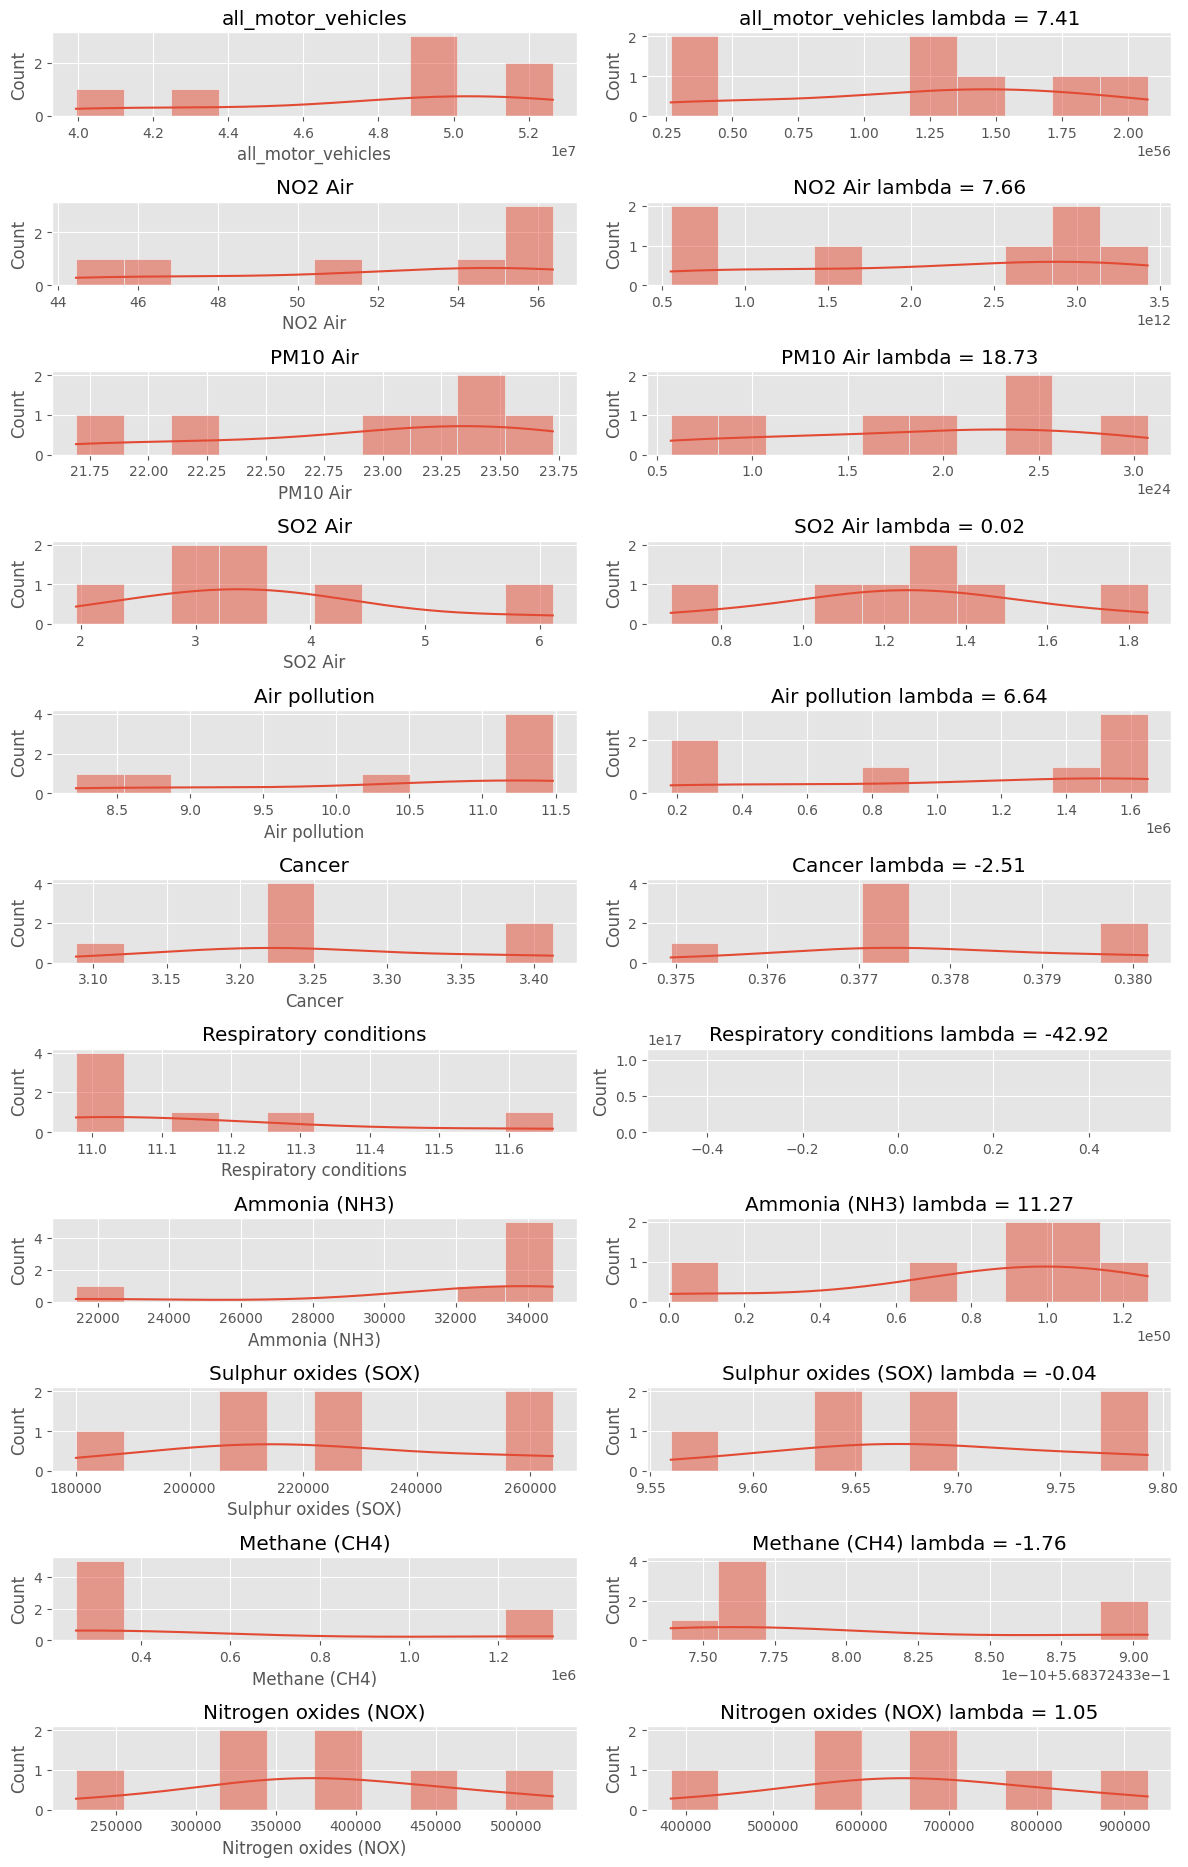

In [111]:

lambdas = plot_dist(data1,figsize=(12,20))

In [112]:
lambdas[6]=1
lambdas = pd.DataFrame(lambdas).T
data1_old = data1
data1 = pd.DataFrame(data1.values** lambdas.values.flatten(),columns=data1.columns)
data1.index = data1_old.index

All the transformations concerning the data2 demonstrated some improvement in the shape of the data distribution, so they will be applied and used in the next analysis

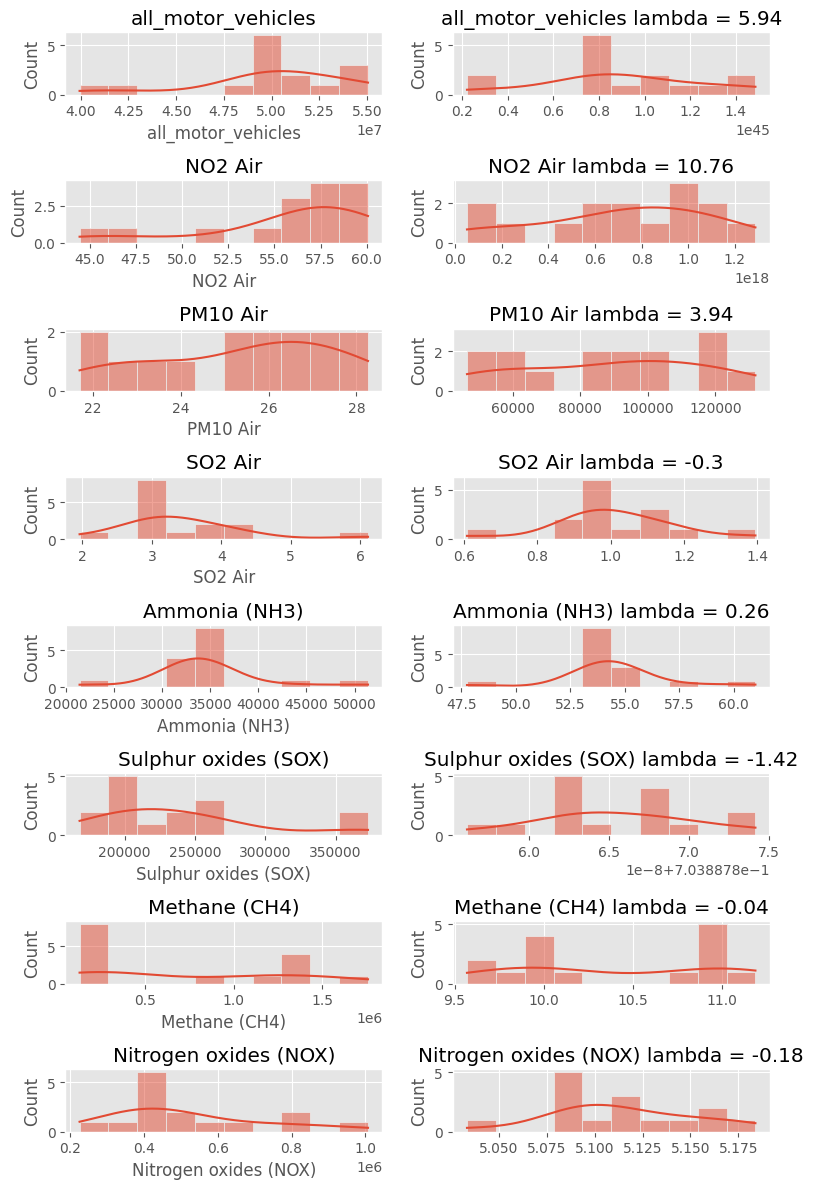

In [113]:
lambdas = plot_dist(data2,figsize=(8,12))

In [114]:
lambdas = pd.DataFrame(lambdas).T
data2_old = data2
data2 = pd.DataFrame(data2.values** lambdas.values.flatten(),columns=data2.columns)
data2.index = data2_old.index



#### Normalization

The second tranformation applied is normalization and the method chosen is Z-score normalization  
Now, it's possible to reach so conclusion, by raw analysing the data:

#### Data1

- The cancer rate, had highly decreased since 2019 and had a big leap in 2021
- The respiratory conditions values started growing since 2019, and reached its maximum value at 2021, being this value way higher than the others.
- Air pollution decreased from 2020 on, similiary to vehicles flow.

In [115]:
data1 = (data1-data1.mean())/data1.std()
data1

all_motor_vehicles   NO2 Air  PM10 Air   SO2 Air  Air pollution  \
Year                                                                    
2015            0.124221  0.416349  1.302243 -0.525431      -0.336905   
2016            0.130695  1.105527  0.160506  0.597542       0.822723   
2017            0.241093 -0.437962 -1.445415 -0.244178       0.865855   
2018            0.843416 -1.180832 -1.095935 -1.630185       0.831819   
2019            1.297587 -1.385476 -0.273085  1.622852       0.473009   
2020           -1.455186  0.741196  0.675843  0.089700      -1.239481   
2021           -1.181826  0.741196  0.675843  0.089700      -1.417020   

        Cancer  Respiratory conditions  Ammonia (NH3)  Sulphur oxides (SOX)  \
Year                                                                          
2015  0.237017               -0.655211       0.166196              1.551976   
2016  0.237017               -0.655211       1.021770             -1.255036   
2017  0.237017               -0.655211       0.166196             -1.255036   
2018  0.237017               -0.655211      -0.464807              0.469554   
2019 -1.379931                0.073270      -2.013241              0.469554   
2020 -1.158447                0.555334       0.561943              0.009494   
2021  1.590309                1.992242       0.561943              0.009494   

      Methane (CH4)  Nitrogen oxides (NOX)  
Year                                        
2015       0.404115              -1.620922  
2016       0.615931               0.822705  
2017       0.865433               1.530405  
2018      -1.448558               0.130411  
2019      -1.448558              -0.044503  
2020       0.505819              -0.409048  
2021       0.505819              -0.409048

#### Data2



- Vehicles flow higly decreased in 2020  and it's maximum values was reached between 2007 and 2009
- Emisson of  NH3 and  the quantity of S02 in the air, appear having similar behavior and even having some similarities with traffic flow 
- Ch4 had high increament in 2018
- Emission of NOX was irregular until 2016

In [116]:
data2=(data2-data2.mean())/data2.std()
data2

all_motor_vehicles   NO2 Air  PM10 Air   SO2 Air  Ammonia (NH3)  \
Year                                                                    
2007            1.513797  0.328317  0.259706 -0.493381      -0.018860   
2008            1.604308  0.069903  0.417107 -0.775690       1.343575   
2009            1.251647  0.617188  0.107389 -0.181633       2.387793   
2010            0.399455  0.759782 -0.081154 -0.648107       0.143116   
2011           -0.115487 -0.317024  1.151922  0.604131      -0.268520   
2012           -0.456320  1.549413  0.571721  0.437569      -0.068135   
2013           -0.432779  0.564327  1.555872  0.182436      -0.184376   
2014           -0.316699 -0.053180 -0.085252  0.357418      -0.184376   
2015           -0.332504 -0.694199 -0.842286  0.591945      -0.101164   
2016           -0.326815 -0.155441 -1.042985 -0.971810       0.062559   
2017           -0.230360 -1.273569 -1.560746  0.181463      -0.101164   
2018            0.279708 -1.673602 -1.395817  2.337583      -0.268520   
2019            0.649310 -1.760568 -1.141133 -2.236806      -2.489865   
2020           -1.899355  1.019327  1.042828  0.307441      -0.126031   
2021           -1.587906  1.019327  1.042828  0.307441      -0.126031   

      Sulphur oxides (SOX)  Methane (CH4)  Nitrogen oxides (NOX)  
Year                                                              
2007             -0.371466       1.427612              -0.837587  
2008             -0.664205       1.110478              -1.237072  
2009             -1.735782       0.661332              -1.329361  
2010              1.872636       1.206013              -0.083797  
2011             -0.335706      -0.916530              -1.797667  
2012              0.349344      -0.617221               0.607314  
2013              0.589644      -1.317520               0.595576  
2014             -1.647194       0.663384              -0.329650  
2015              1.375715       0.569175               2.103742  
2016             -0.649204       0.631021               0.131307  
2017             -0.649204       0.696789              -0.217125  
2018              0.466356      -1.028633               0.537767  
2019              0.466356      -1.028633               0.653679  
2020              0.466356      -1.028633               0.601438  
2021              0.466356      -1.028633               0.601438

### Correlations and Covariances

Now, some analysis will be done around the covariance matrixes, that actually are correaltion matrixes, since the data is normalize.  
It's almost impossible to whitdraw some of information of the convariance matrix because the scales are too diferent, so, the correlation will be the only one considered


 Correlation  may  be  described  as  the  degree  of  association  between two variables. The correlation can vary in an interval between -1 and 1.

We will only visualize values of correlation  between 0.5 - 1 and -1 - (-0.5) because those are the ranges that show some kind of relationship accordingly to [1], being 0.5 - 0.75 a moderate
relationship and 0.75 - 1 a strong relationship, this is applied also for the negative values, the fact that they are negative doesn't mean absence of correlation, the correlation is just negative, in other words, when one variable increases the other one deacreases.  


##### Data1

In [117]:
corr1 = data1.corr()

For this data we will only analyze health conditions:

-  Respiratory conditions decrease when there is an increament of the traffic flow and high air pollution
-  Air pollution and traffic flow beahaviors are highly similar, also Air pollution tend to deacrease when the quantity of N02 and PM10  decreases in the air.
-  Cancer is related to the emission of ammonia and this one decreases when the quantity of SO2 increases and vice-versa.

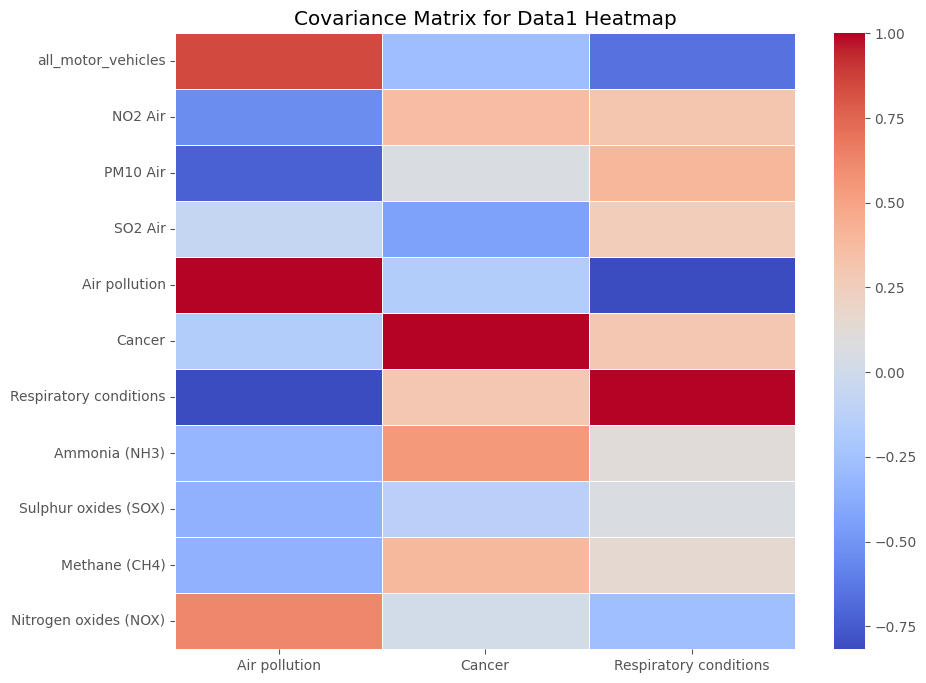

In [118]:
data_columns = ["Air pollution", "Cancer", "Respiratory conditions"]
heatmap_data = corr1.loc[data_columns, :].T

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', fmt=".2f", linewidths=0.5, xticklabels=data_columns)
plt.title('Covariance Matrix for Data1 Heatmap')

# Rotate the y-axis labels for better visibility
plt.yticks(rotation=0)

plt.show()

##### Data2

In [119]:
['Methane (CH4)', 'all_motor_vehicles', 'Respiratory conditions',
                  'Air pollution','PM10 Air','NO2 Air',
                  'Cancer','SO2 Air','Ammonia (NH3)']
corr2 = data2.corr()

- Traffic flow behavior is opposite to NOX emissions  
- N02 has high correlation with PM10 
- SOX and NOX emission have a solid correlation


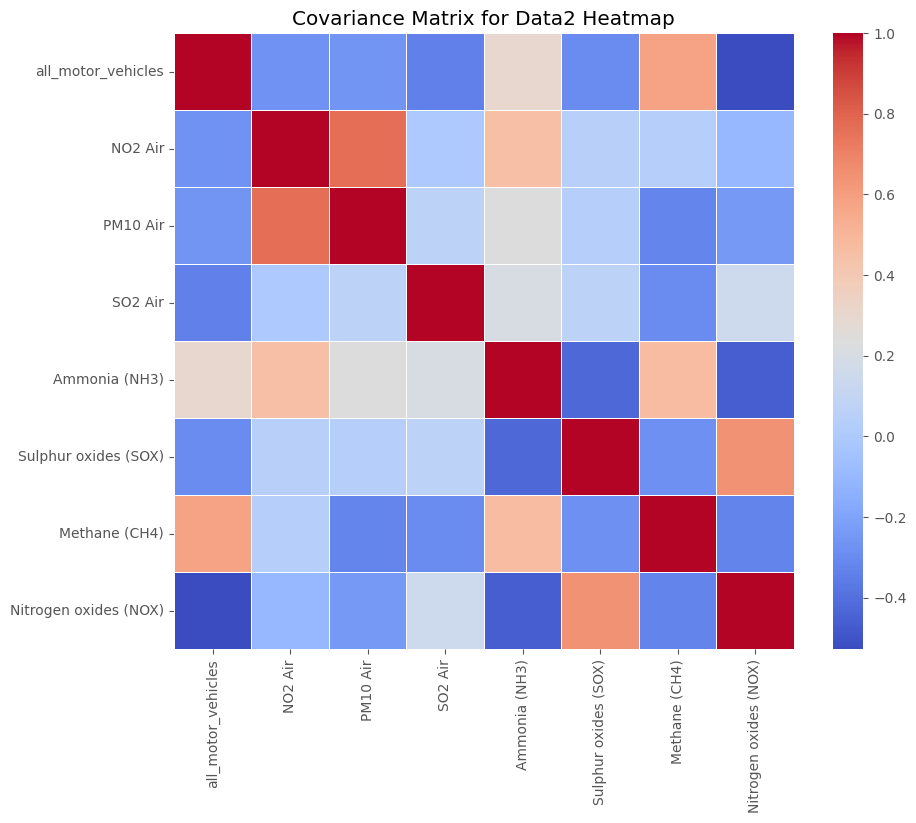

In [120]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr2, cmap='coolwarm', fmt=".2f", linewidths=0.5,)
plt.title('Covariance Matrix for Data2 Heatmap')
plt.show()

## Multiple Relations

In this chapter we will make use of scatter plot and line chart. The scatter plot will be done with pair plot and line chart will be combine the variables the are most related.  
This visualization method can show some information that is hidden in the correlation matrix which is just an application of formulas.


The pair plot allow us to see the evolution of a variable upon another one, if the majoraty of points have the tendency of forming a linear equation then they have some kind of relation. 
The line chart only shows the individual behavior of each variable over time, however, with that information, It's possible  conclude if there are variables with similar behavior by combining each other.

In [121]:
def plot_variable_pairs(data, pairs_to_plot, figsize=(12, 15)):
    num_pairs = len(pairs_to_plot)
    num_rows = int(np.ceil(num_pairs / 2))  # Calculate the number of rows needed

    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=figsize)
    fig.suptitle('Evolution of Variables Over Time', fontsize=16)

    axes = axes.flatten()  # Flatten the array for one-dimensional indexing

    for i, variable_tuple in enumerate(pairs_to_plot):
        ax = axes[i]
        
        for column in variable_tuple:
            ax.plot(data.index, data[column], label=column)

        ax.set_xlabel('Year')
        ax.set_ylabel('Variable Value')
        ax.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

In this pair plot we can conclude that:

- Respiratory conditions is positively correlated with PM10 in the air and negatively correlated Air pollution
- Air pollution is positively correlated with traffic flow and negatively correlated with PM10, NO2 in the air and with CH4 emission.
- Cancer is positively correlated with NH3 and negatively correlated with SO2 in the air.In this variable the virtual lines are not so clearly detected , even so,  the correaltion metioned are the most significative.

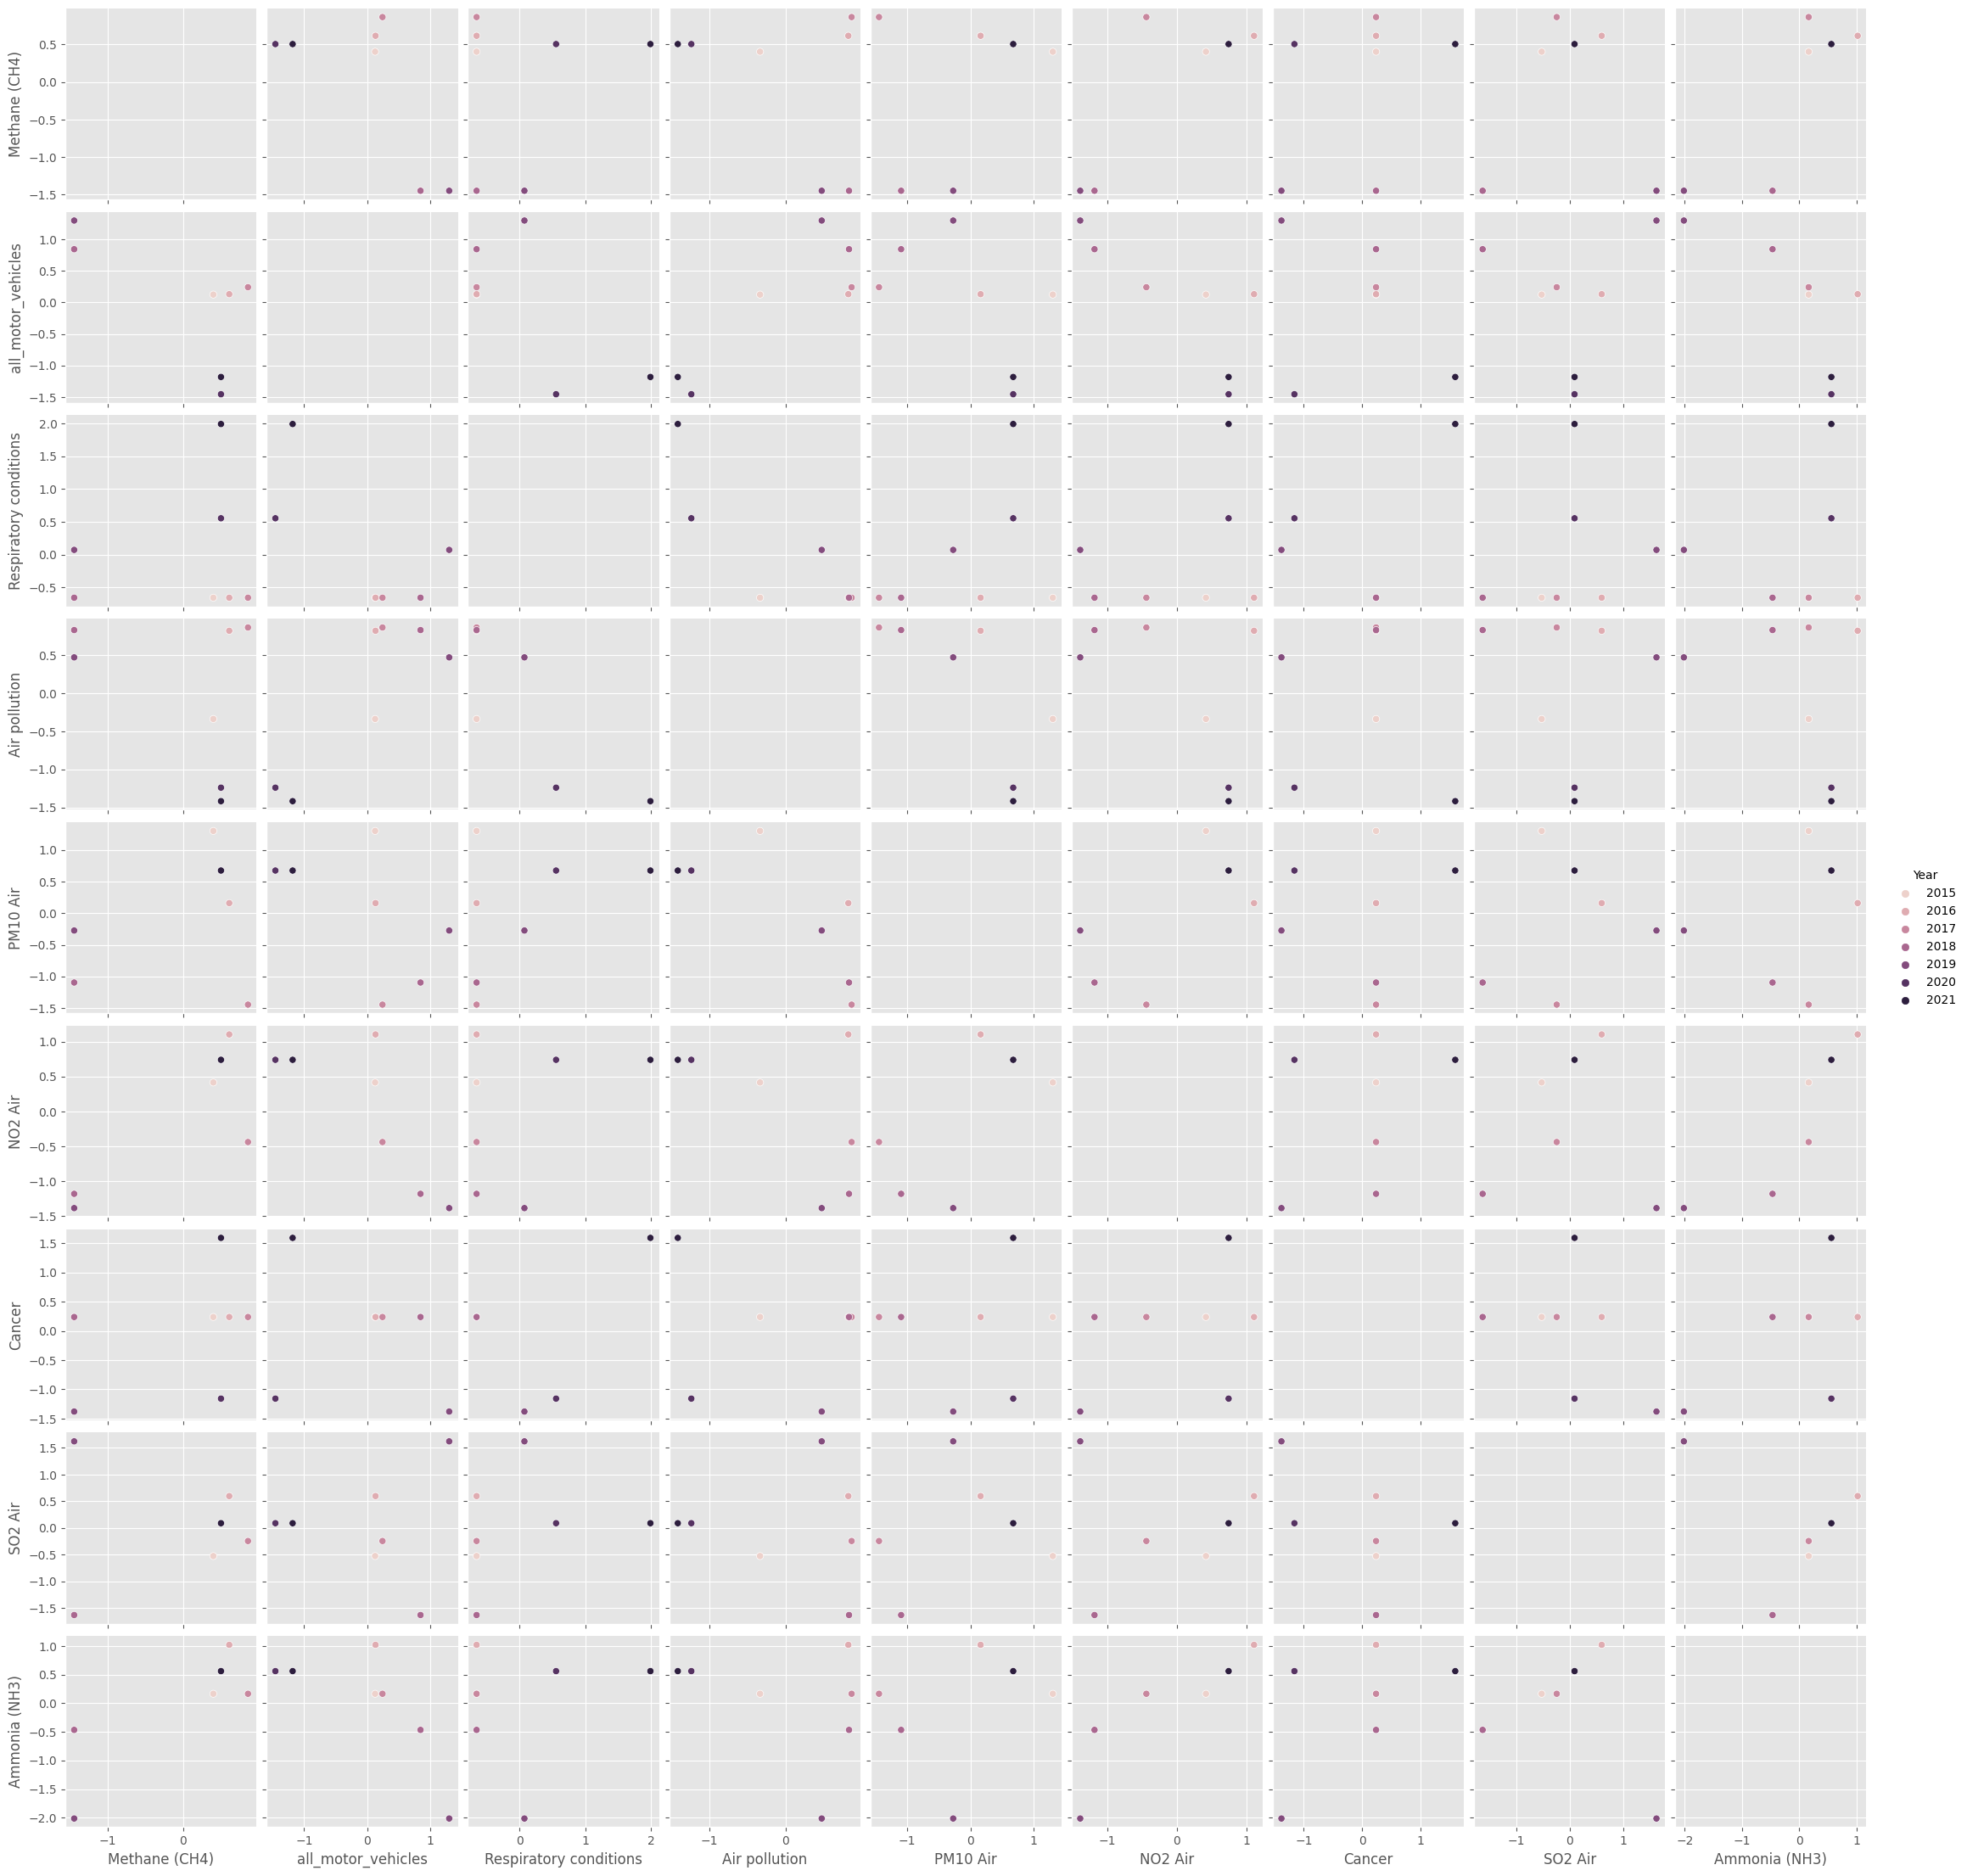

In [122]:
data1_reset = data1.reset_index()
sns.pairplot(data1_reset,vars= ['Methane (CH4)', 'all_motor_vehicles', 'Respiratory conditions',
                  'Air pollution','PM10 Air','NO2 Air',
                  'Cancer','SO2 Air','Ammonia (NH3)']
                  ,hue='Year')

The line chart confirms all the conclusions made in the pair plot analysis. This representation gives a clearer idea about the relashionship between the features compared to previous figure, however, it doesn't support all the features at once, the visualization would become too heavy and confusing, the stratagy of pairs would have to be adopted to realize that goal.

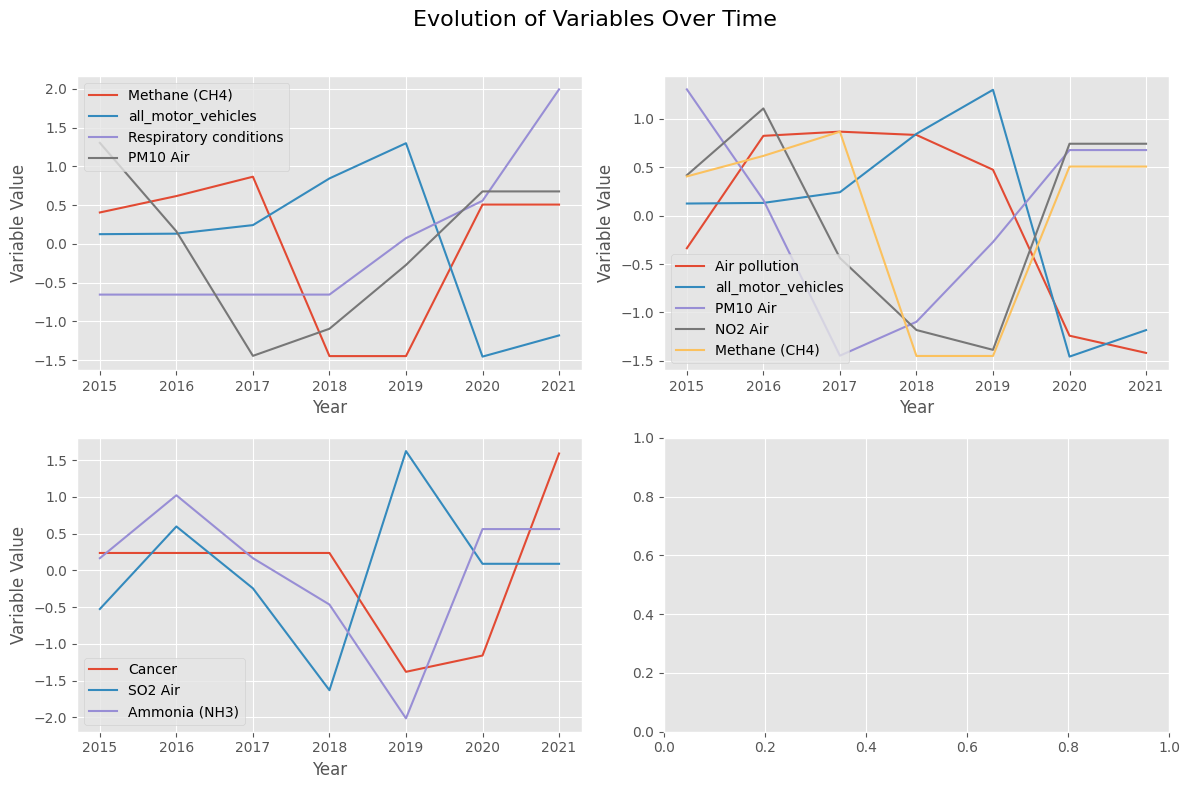

In [123]:
pairs_to_plot1 = [('Methane (CH4)', 'all_motor_vehicles', 'Respiratory conditions','PM10 Air'),
                  ('Air pollution','all_motor_vehicles','PM10 Air','NO2 Air','Methane (CH4)'),
                  ('Cancer','SO2 Air','Ammonia (NH3)')
                  ]
plot_variable_pairs(data1, pairs_to_plot1,figsize=(12,8))

In this pair plot is possibbe to see:

- Methane emssion is negatively correalted with the quatity of PM10 in the air.
- Quatity of PM10 and NO2 in the air are positively correlated.


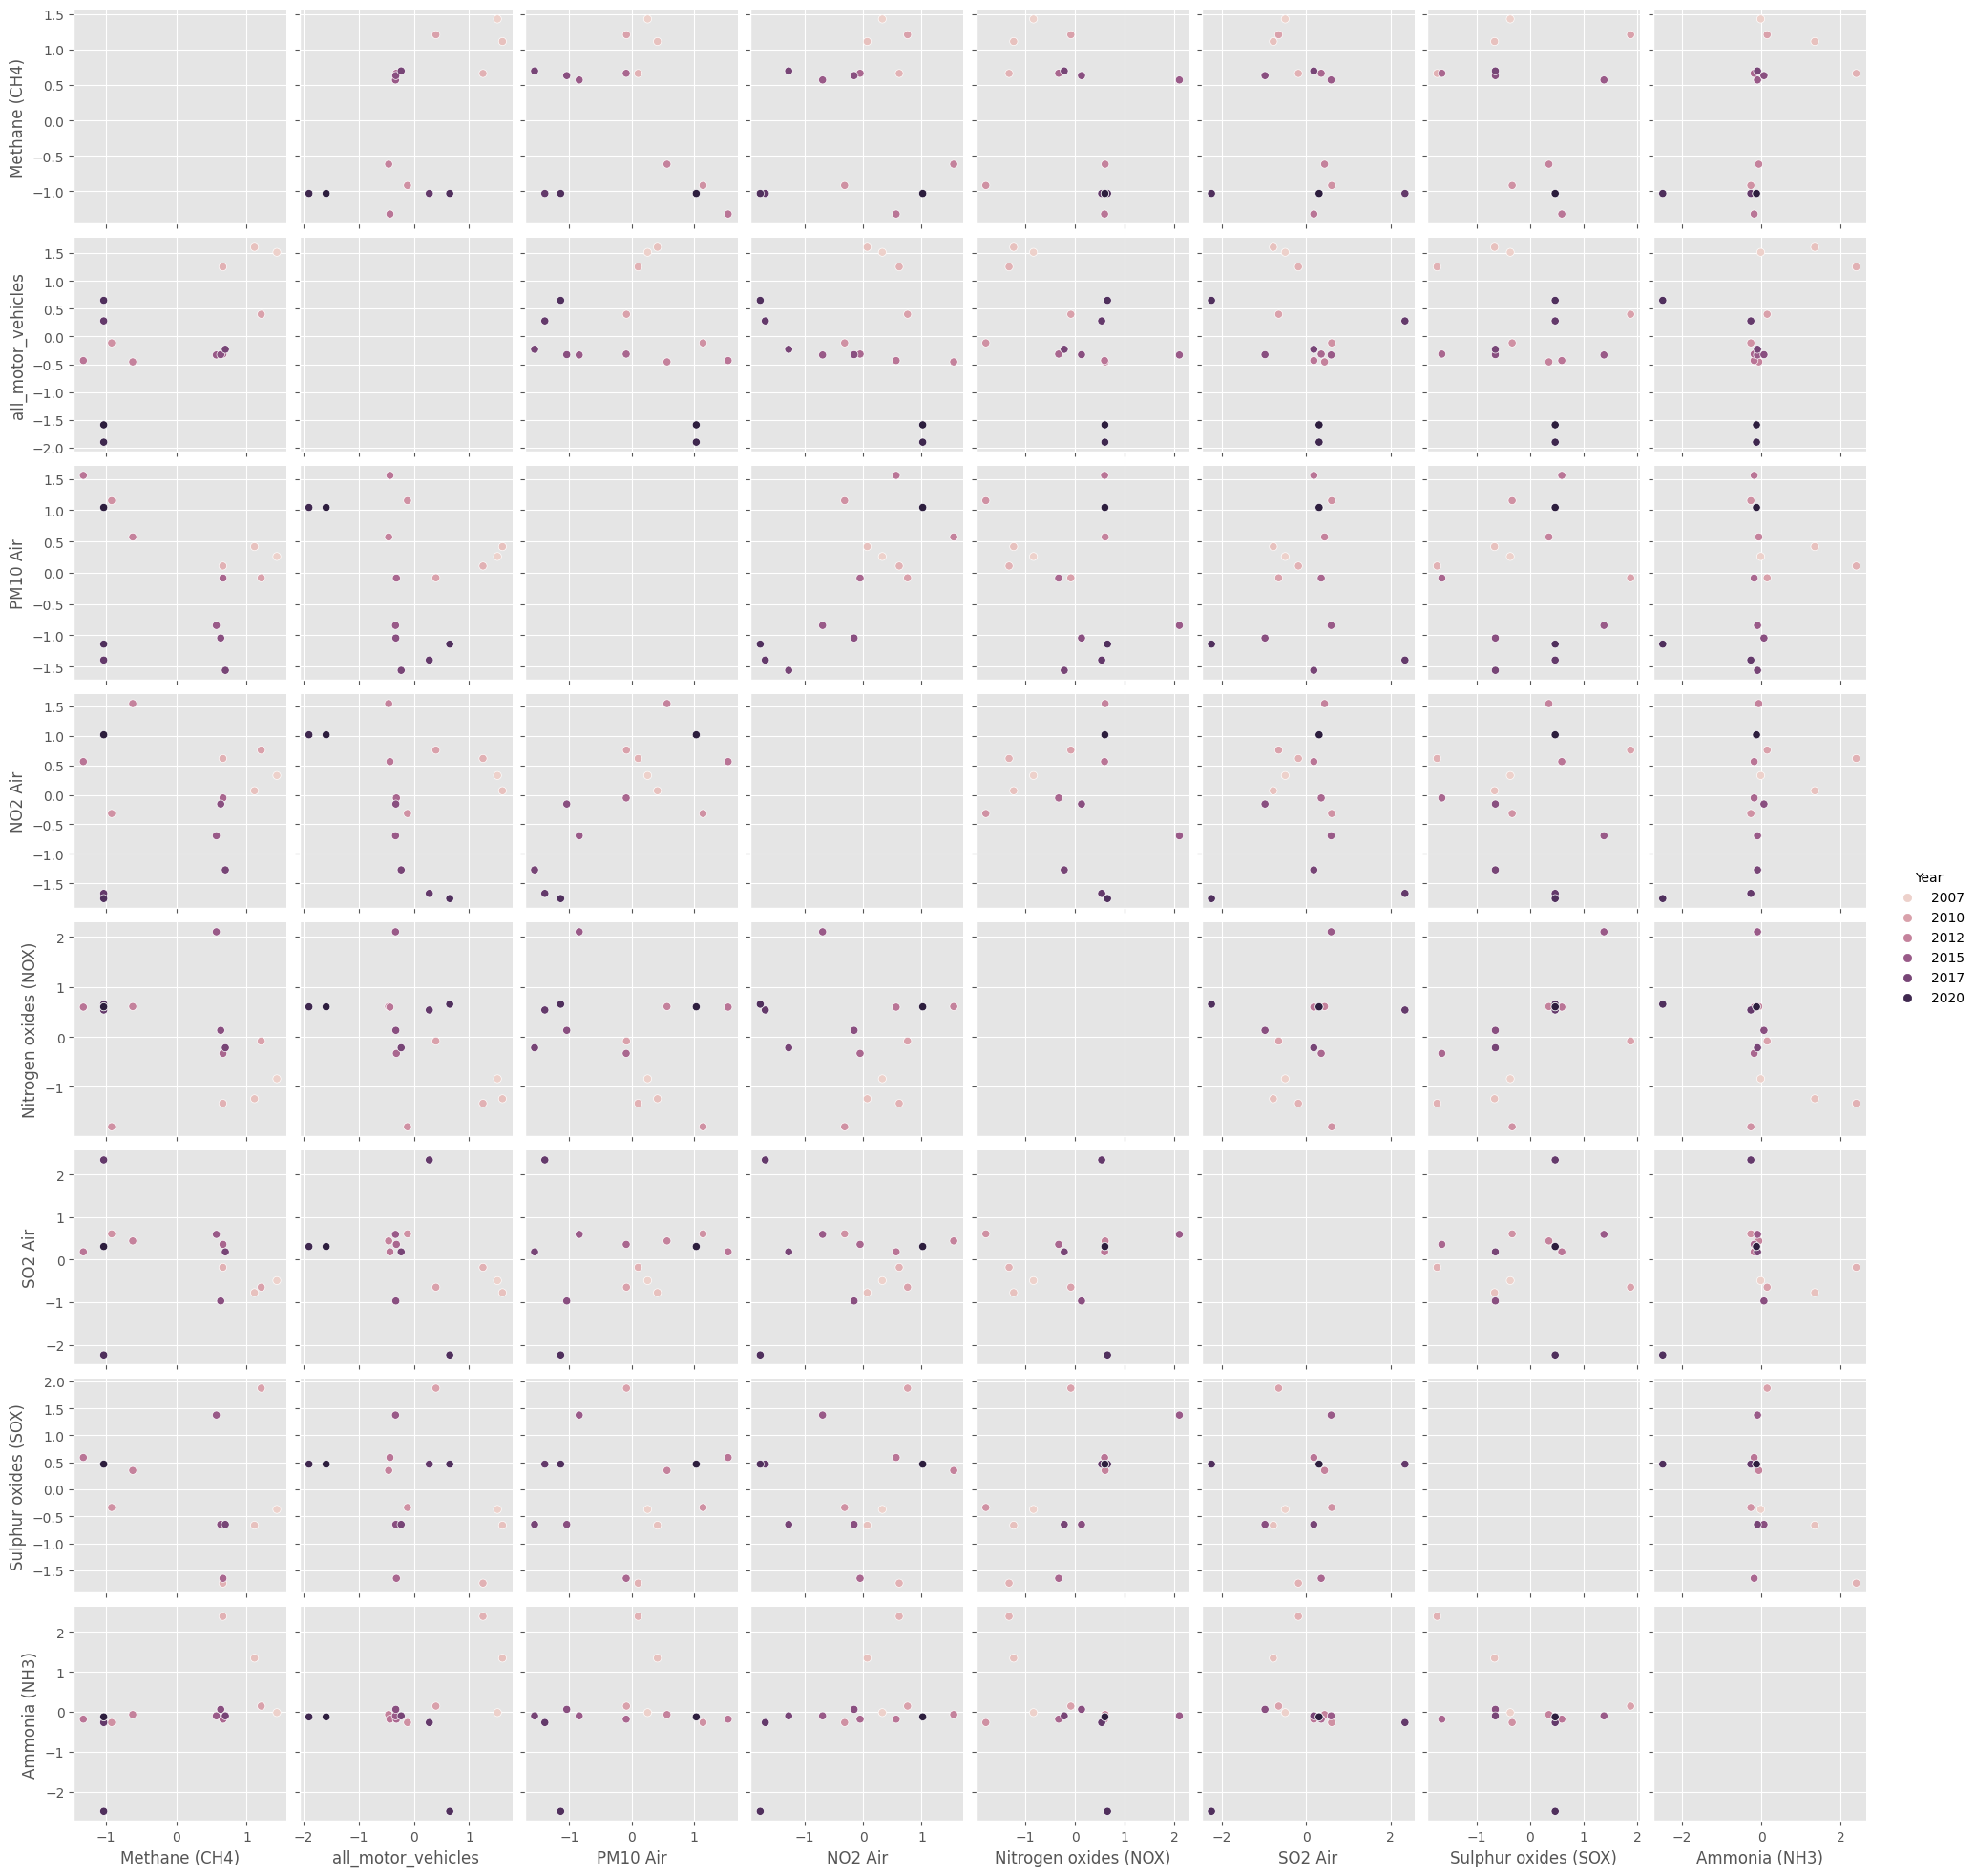

In [124]:
data2_reset = data2.reset_index()
sns.pairplot(data2_reset,vars= ['Methane (CH4)', 'all_motor_vehicles','PM10 Air','NO2 Air', 'Nitrogen oxides (NOX)','SO2 Air',
                                'Sulphur oxides (SOX)','Ammonia (NH3)'] ,hue='Year')

The set of line chart graphics confirm all the statements mentioned before except  the relation between NOX and vehicles flow.  
The relation doesn't corresponder to a negative correlation.

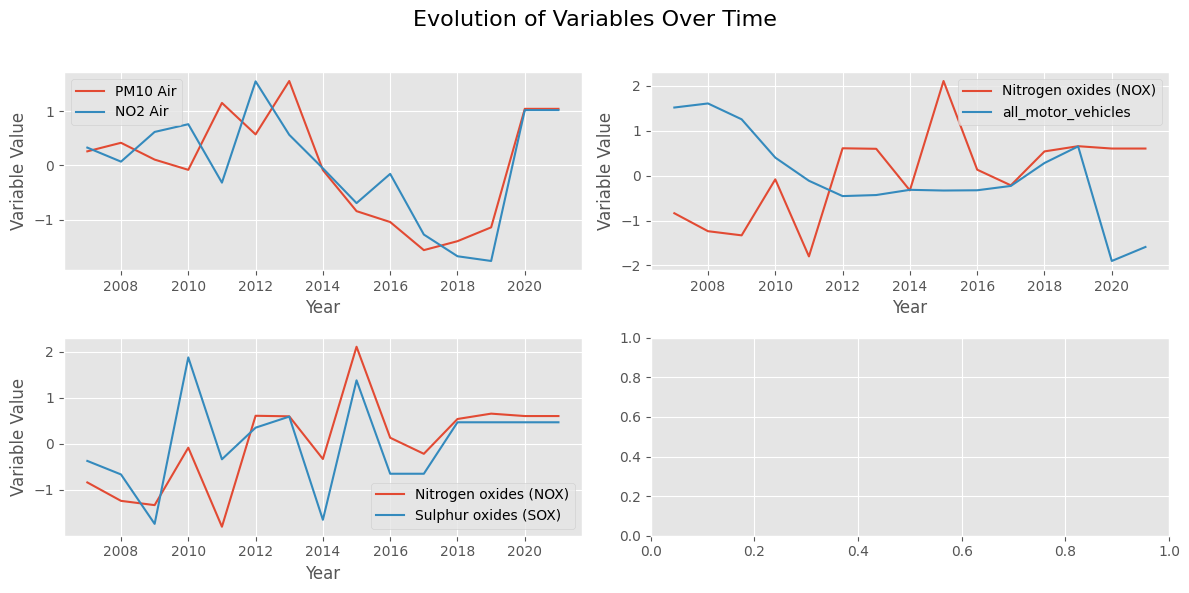

In [125]:
pairs_to_plot2 = [('PM10 Air','NO2 Air'),
                  ('Nitrogen oxides (NOX)','all_motor_vehicles'),
                  ('Nitrogen oxides (NOX)','Sulphur oxides (SOX)')]
plot_variable_pairs(data2, pairs_to_plot2,figsize=(12,6))


### Clustering

As part of a data analysis process called clustering, related data points are grouped together into discrete, homogeneous sets according to their shared traits or attributes. Finding patterns, similarities, and relationships in a dataset is the main goal of clustering, as it helps reveal underlying structure and promotes deeper comprehension.
There are several clustering algorithms, and each has advantages and disadvantages of its own. Among the widely used techniques are DBSCAN (Density-Based Spatial Clustering of Applications with Noise), hierarchical clustering, and K-means. Data is divided into a preset number of clusters using K-means algorithm.
We'll use this technique to look for patterns in the data and determine whether it works well with our data.

##### K-Means


K-means is an iterative process that automatically assign every example of a data-set to a cluster. It begins by randomly creating n points, corresponding to n clusters, and every examples will consider his cluster the point which is closer to it, after that, the algorithm will calculate the centroid of every cluster and execute the process described before until one iteration doesn't exhibit changes in the clusters.

/home/casal/anaconda3/envs/firstEnv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/casal/anaconda3/envs/firstEnv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/casal/anaconda3/envs/firstEnv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/casal/anaconda3/envs/firstEnv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarni

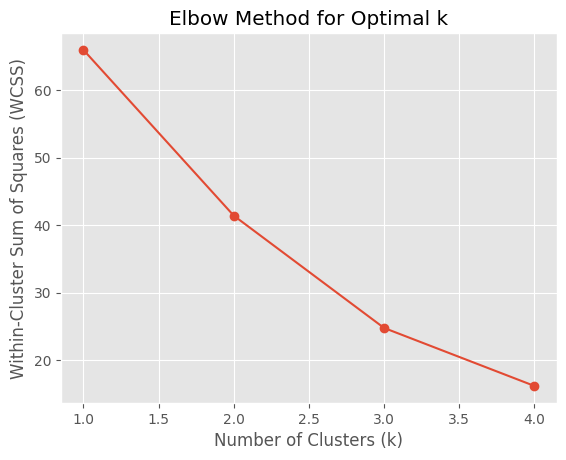

In [126]:
from sklearn.cluster import KMeans
num_clusters_range = range(1, 5) 
wcss = []
for k in num_clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data1)
    wcss.append(kmeans.inertia_)

plt.plot(num_clusters_range, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

As the figure below shows, there are four better clusters. However, after testing, we found that three clusters had the higher silhouette score, therefore we chose to utilize three.

In [127]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data1['Cluster'] = kmeans.fit_predict(data1)

display(data1)


/home/casal/anaconda3/envs/firstEnv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


all_motor_vehicles   NO2 Air  PM10 Air   SO2 Air  Air pollution  \
Year                                                                    
2015            0.124221  0.416349  1.302243 -0.525431      -0.336905   
2016            0.130695  1.105527  0.160506  0.597542       0.822723   
2017            0.241093 -0.437962 -1.445415 -0.244178       0.865855   
2018            0.843416 -1.180832 -1.095935 -1.630185       0.831819   
2019            1.297587 -1.385476 -0.273085  1.622852       0.473009   
2020           -1.455186  0.741196  0.675843  0.089700      -1.239481   
2021           -1.181826  0.741196  0.675843  0.089700      -1.417020   

        Cancer  Respiratory conditions  Ammonia (NH3)  Sulphur oxides (SOX)  \
Year                                                                          
2015  0.237017               -0.655211       0.166196              1.551976   
2016  0.237017               -0.655211       1.021770             -1.255036   
2017  0.237017               -0.655211       0.166196             -1.255036   
2018  0.237017               -0.655211      -0.464807              0.469554   
2019 -1.379931                0.073270      -2.013241              0.469554   
2020 -1.158447                0.555334       0.561943              0.009494   
2021  1.590309                1.992242       0.561943              0.009494   

      Methane (CH4)  Nitrogen oxides (NOX)  Cluster  
Year                                                 
2015       0.404115              -1.620922        2  
2016       0.615931               0.822705        0  
2017       0.865433               1.530405        0  
2018      -1.448558               0.130411        1  
2019      -1.448558              -0.044503        1  
2020       0.505819              -0.409048        2  
2021       0.505819              -0.409048        2

In [128]:
from sklearn.metrics import silhouette_score
features_for_clustering = data1.drop(columns=['Cluster'])
silhouette_avg = silhouette_score(features_for_clustering, data1['Cluster'])
print(f"The silhouette score for the clustering is: {silhouette_avg}")

The silhouette score for the clustering is: 0.24288783655404816


DATA2 Clustering


/home/casal/anaconda3/envs/firstEnv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/casal/anaconda3/envs/firstEnv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/casal/anaconda3/envs/firstEnv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/casal/anaconda3/envs/firstEnv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarni

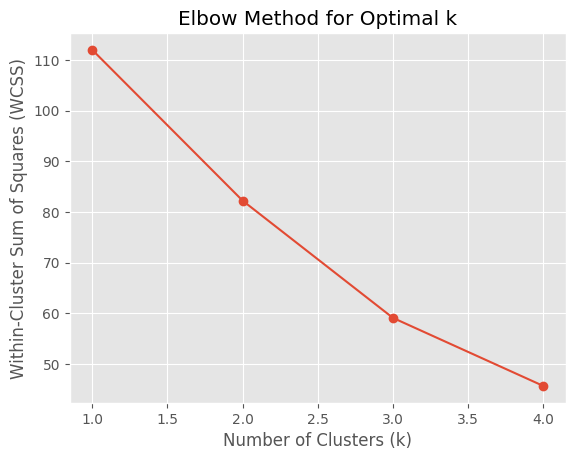

In [129]:
num_clusters_range = range(1, 5) 
wcss = []
for k in num_clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data2)
    wcss.append(kmeans.inertia_)

plt.plot(num_clusters_range, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In this example, the superior silhouette score is for three clusters, much like in data 1.

In [130]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data2['Cluster'] = kmeans.fit_predict(data2)

display(data2)


/home/casal/anaconda3/envs/firstEnv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


all_motor_vehicles   NO2 Air  PM10 Air   SO2 Air  Ammonia (NH3)  \
Year                                                                    
2007            1.513797  0.328317  0.259706 -0.493381      -0.018860   
2008            1.604308  0.069903  0.417107 -0.775690       1.343575   
2009            1.251647  0.617188  0.107389 -0.181633       2.387793   
2010            0.399455  0.759782 -0.081154 -0.648107       0.143116   
2011           -0.115487 -0.317024  1.151922  0.604131      -0.268520   
2012           -0.456320  1.549413  0.571721  0.437569      -0.068135   
2013           -0.432779  0.564327  1.555872  0.182436      -0.184376   
2014           -0.316699 -0.053180 -0.085252  0.357418      -0.184376   
2015           -0.332504 -0.694199 -0.842286  0.591945      -0.101164   
2016           -0.326815 -0.155441 -1.042985 -0.971810       0.062559   
2017           -0.230360 -1.273569 -1.560746  0.181463      -0.101164   
2018            0.279708 -1.673602 -1.395817  2.337583      -0.268520   
2019            0.649310 -1.760568 -1.141133 -2.236806      -2.489865   
2020           -1.899355  1.019327  1.042828  0.307441      -0.126031   
2021           -1.587906  1.019327  1.042828  0.307441      -0.126031   

      Sulphur oxides (SOX)  Methane (CH4)  Nitrogen oxides (NOX)  Cluster  
Year                                                                       
2007             -0.371466       1.427612              -0.837587        2  
2008             -0.664205       1.110478              -1.237072        2  
2009             -1.735782       0.661332              -1.329361        2  
2010              1.872636       1.206013              -0.083797        2  
2011             -0.335706      -0.916530              -1.797667        0  
2012              0.349344      -0.617221               0.607314        0  
2013              0.589644      -1.317520               0.595576        0  
2014             -1.647194       0.663384              -0.329650        1  
2015              1.375715       0.569175               2.103742        1  
2016             -0.649204       0.631021               0.131307        1  
2017             -0.649204       0.696789              -0.217125        1  
2018              0.466356      -1.028633               0.537767        1  
2019              0.466356      -1.028633               0.653679        1  
2020              0.466356      -1.028633               0.601438        0  
2021              0.466356      -1.028633               0.601438        0

In [131]:
features_for_clustering2 = data2.drop(columns=['Cluster'])
silhouette_avg = silhouette_score(features_for_clustering2, data2['Cluster'])
print(f"The silhouette score for the clustering is: {silhouette_avg}")

The silhouette score for the clustering is: 0.27488883269604536


The clusters in our data have some degree of separation, the clustering result is not very strong, and there may be room for improvement but they are not well-defined and indicate some points, as indicated by the small silhouette score of 0.24288783655404816 and 0.27488883269604536:
 - The score for the silhouette is a number between -1 and 1, with negative values suggesting that data points might have been incorrectly assigned to clusters. A score this close to zero, as it is in our instance, indicates that there may be some overlap or ambiguity in the way the points are assigned to the clusters and that the clusters are not clearly separated.
 - Clusters that lack cohesiveness or are difficult to differentiate from one another.
 - The Possible Overfitting, A clustering algorithm that is too sensitive to noise or has too many clusters may produce tiny.




 

### PCA / Dimension Reduction


PCA is very usefull tecnique that can be used in various areas with the goal of reduzing the file size or for computacional efficiency purposes.  
It allows  a reduction of dimensionality of data making all variables independent, so , if the data has n features the PCA will produce n components, knowing that var(PC1) > var (PC2) > ... var(PCn), i.e, the first compenents have more variance, more representation of the data.  
This is done by the rotation of the axis in way the first axis goes trough, as many points as possbile, the same happens to the second etc...

In this chapter, PCA will be used has an aditional tool to obtain information about data, more specifically using BiPlot, For that matter we will use the first two components of the PCA.

In [132]:
data1.drop("Cluster",axis=1,inplace=True)
data2.drop("Cluster",axis=1,inplace=True)

In [133]:
def apply_pca(data):
    pca = PCA(n_components=2) 
    X_pca = pca.fit_transform(data)
    PC1 = X_pca[:,0]
    PC2 = X_pca[:,1]
    scalePC1 = 1.0/(X_pca[:,0].max() - X_pca[:,0].min())
    scalePC2 = 1.0/(X_pca[:,1].max() - X_pca[:,1].min())
    data1_pca = pd.DataFrame(X_pca, columns=['Principal Component 1', 'Principal Component 2'])
    data1_pca.index = data.index
    ldngs = pca.components_
    return ldngs,PC1,PC2,scalePC1,scalePC2,data1_pca

[4] A biplot is a standard way of showing the sample scores and variable loadings in a single
plot. Doing this will not only show which samples are similar to one another, but how the
variables control this similarity.

We have some ways to take information from a biplot:

- We can infer the relation between the variables by the angle that they form with each other. For example, if two variables form an angle of 0 the correlation is maximum, because cos(0) = 1.
- It's possible to see if a variable present values above or under average for a certain year, by projection the point of the year into the vector of the variable. For example if the projection intersects with the vector after the end of that same vector, we can conclude that the the point is above average.

#### BiPlot

In [134]:
def biplot(data, ldngs, PC1, PC2, scalePC1, scalePC2, figsize=(14, 9)):
    fig, ax = plt.subplots(figsize=figsize)
    features = data.columns
    
    # Add this line to obtain the explained variance for PC1 and PC2
    explained_var_pc1 = np.var(PC1 * scalePC1)
    explained_var_pc2 = np.var(PC2 * scalePC2)

    for i, feature in enumerate(features):
        ax.arrow(0, 0, ldngs[0, i], ldngs[1, i], head_width=0.01, head_length=0.01, color="red")
        ax.text(ldngs[0, i] * 1.15, ldngs[1, i] * 1.15, feature, color="red", fontsize=12)

        ax.scatter(PC1 * scalePC1, PC2 * scalePC2, s=5)

    for i, label in enumerate(data.index):
        ax.text(PC1[i] * scalePC1, PC2[i] * scalePC2, str(label), fontsize=16)

    # Include the variance explained in the x and y labels
    ax.set_xlabel(f'PC1 (Explained Variance: {explained_var_pc1:.2%})', fontsize=14)
    ax.set_ylabel(f'PC2 (Explained Variance: {explained_var_pc2:.2%})', fontsize=14)
    ax.set_title('Biplot with Variance Explained', fontsize=20)

##### Data1

In [135]:
ldngs,PC1,PC2,scalePC1,scalePC2,data1_pca = apply_pca(data1)
data1_pca

Principal Component 1  Principal Component 2
Year                                              
2015               1.090273              -1.709513
2016               0.380004               2.047773
2017              -1.203122               2.510464
2018              -2.311153              -0.217087
2019              -2.843370              -1.875421
2020               1.989647              -0.510018
2021               2.897721              -0.246198

Observations:
- Respiratory conditions are very related with PM10 and have a decent correlation with NO2, however, is negatively correlated with Air pollution, vehicles flow and NOX emission.  
In the year 2015,2020, 2021 the level of respiratory conditions were above average and in 2017, 2018 under average.
- Cancer has a huge correlation with Ammonia and Methane a great relation with NO2.  
Year 2021 is highlighted by its high level of cancer index, 2018 and 2019 present low levels of cancer level compared to the other examples
- Air polution has some connection with NOX emission and traffic flow is negatively correlated with the quantity if PM10 in the air.
 The year 2018 and 2019 have values above average and 2015,2020 under the average. In the 2021 the level of air pollution is really low compared to the other values

We can notice that the explained variance is really low, i.e, only around 25% of the data is represented by the pricipal components, however, is still possible to to withdraw trsutfull information from the graph

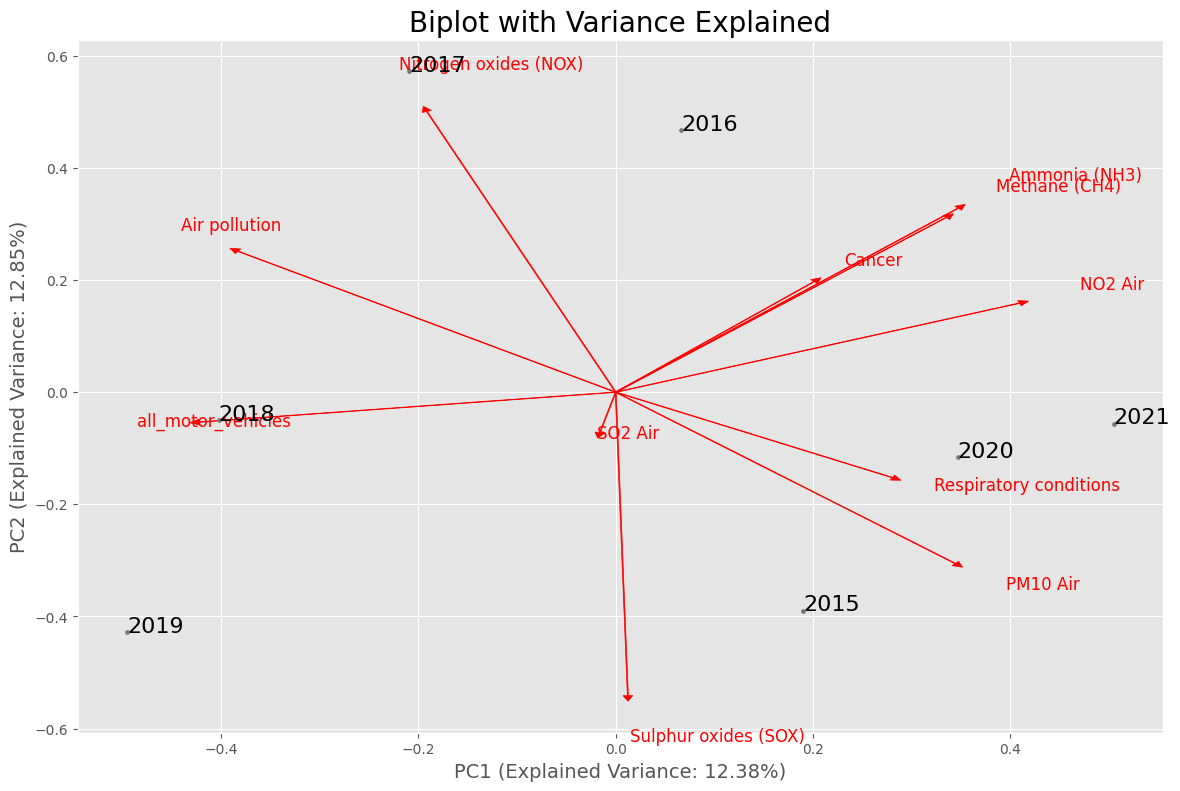

In [136]:
biplot(data1,ldngs,PC1,PC2,scalePC1,scalePC2)

In [137]:
ldngs,PC1,PC2,scalePC1,scalePC2,data1_pca = apply_pca(data2)
data1_pca

Principal Component 1  Principal Component 2
Year                                              
2007               1.949862               0.289848
2008               2.756996              -0.114728
2009               3.263577              -0.914848
2010               0.168250               0.025270
2011               0.318774              -0.972100
2012              -0.932953              -1.492359
2013              -1.397116              -1.522793
2014               0.864629               0.012815
2015              -1.667407               1.156469
2016               0.530064               0.920213
2017               0.454343               1.730291
2018              -1.358939               1.474596
2019              -1.409605               3.090874
2020              -1.839569              -1.884891
2021              -1.700905              -1.798657

In this data the quantity of years is superior, so, we will only highlight some cases.
Observations:
- Emmission of NOX and SOX are really related, but, they are negatively correlated with NH3. In 2008 and 2009 the values of those were really under average, and, the peak was reached in the year 2015,2019,2020,2021, all having similar values.
- The evolution of the quantity if NO2 and PM10 in the air is very similar and It's possible to highlight the year 2019 with a really low quantity of those components.
- Traffic flow and emissions of methane have a strong relationship and a negative one with SO2. We can emphasize the values obtain in 2008 and 2009 that are very similar and are the maximum, on the other hand, 2020 and 2021 are the lowest.
- SO2 is not strongly related with any features, however, shares a weak relashionship with SOX,NOX,PM10,NO2. What we talked about in the previous point about the year can be applied here but inversely.
- NH3 has a weak correlation with all variables except NOX and SOX, it reached its maximum at 2009 but 2008 present a pretty high value aswell, 2019 presents the lowest value.

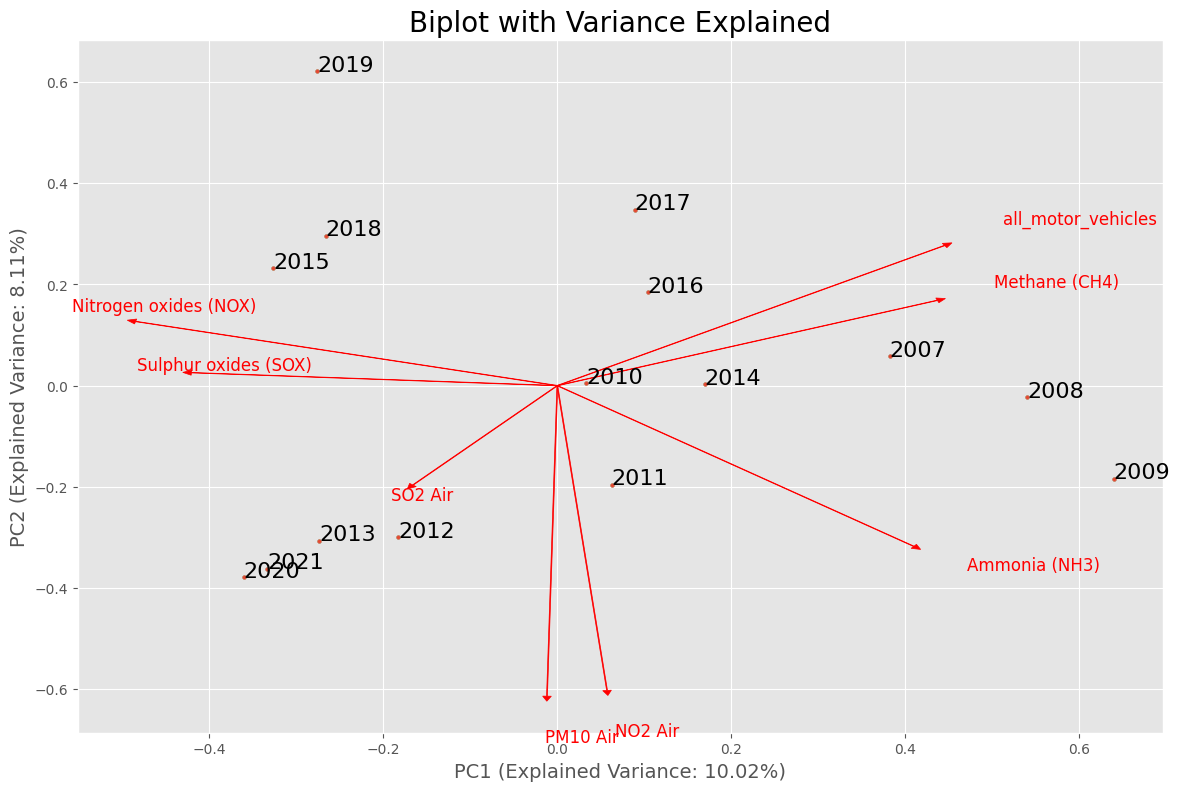

In [138]:
biplot(data2,ldngs,PC1,PC2,scalePC1,scalePC2)

The Biplot alowed us to take some conclusions about the data and to see it in a perspective that is not possible in other methodologies.

### Pollution data analysis

In this chapter the goal is to answer one question related with a single data-set(pollution data). We want to know if the pollution patterns are connected with the region where they reside, i.e., if there are similar type of industries around a certain area.  
In this case only one approach of analyzes will be used, and a simple pre-processing of the data will be done

Those are the cities to be considered. They were selected and grouped  accordingly to their location.

North of England:

    Manchester
    Edinburgh
    Leeds

South of England:

    London
    Southampton
    Bristol

Central England (Midlands):

    Coventry
    Derby
    Leicester

In [139]:
data_pol = pd.read_csv("datasets/pollution.csv",low_memory=False)

data_pol.head(2)

countryName  EPRTRSectorCode    eprtrSectorName EPRTRAnnexIMainActivityCode  \
0     Austria              4.0  Chemical industry                        4(d)   
1     Austria              9.0   Other activities                        9(c)   

                        EPRTRAnnexIMainActivityLabel  \
0  Chemical installations for the production on a...   
1  Installations for the surface treatment of sub...   

                FacilityInspireID                          facilityName  \
0  AT.CAED/9008390392737.FACILITY                   Nufarm GmbH & CO KG   
1  AT.CAED/9008390396414.FACILITY  MAGNA STEYR Fahrzeugtechnik AG&Co KG   

  facilityNameConfidentialityReason  Longitude   Latitude  \
0                               NaN  14.336056  48.290943   
1                               NaN  15.477778  47.019170   

  addressConfidentialityReason                   City targetRelease  \
0                          NaN                   Linz           AIR   
1                          NaN  Graz,07.Bez.:Liebenau           AIR   

                                        pollutant  emissions  reportingYear  \
0                    1,2-dichloroethane (DCE-1,2)     3300.0           2007   
1  Non-methane volatile organic compounds (NMVOC)   170000.0           2007   

  releasesConfidentialityReason  
0                           NaN  
1                           NaN

Since we want to consider the pollution patterns, the only collumns selected to enter the model were the pollutant, the total emission of the pollutant and the cities in order to identify the examples.

In [140]:
cities = ['Manchester', 'Edinburgh', 'Leeds', 'London', 'Southampton', 'Bristol', 'Coventry', 'Derby', 'Leicester']
data_pol = data_pol.loc[:,["pollutant","emissions","City"]]
data_pol.head(2)

pollutant  emissions  \
0                    1,2-dichloroethane (DCE-1,2)     3300.0   
1  Non-methane volatile organic compounds (NMVOC)   170000.0   

                    City  
0                   Linz  
1  Graz,07.Bez.:Liebenau

In [141]:
data_pol = data_pol[data_pol['City'].isin(cities)]


In the next figure we can observe the number of observations for each city, and, as we can see it is not balanced . This is negative for the analysis because it will make the algorithm really bias privinding way  more examples to certain cities . To solve this problem, we need an equal number of examples for each city, and ,  between various methods capable of solving this the choice was undersampling.  
Undersampling simply will randomly choose some elements of one class adn remove them until it equal  the class with the lowest number of examples.

Text(0.5, 1.0, 'Distribution of cities')

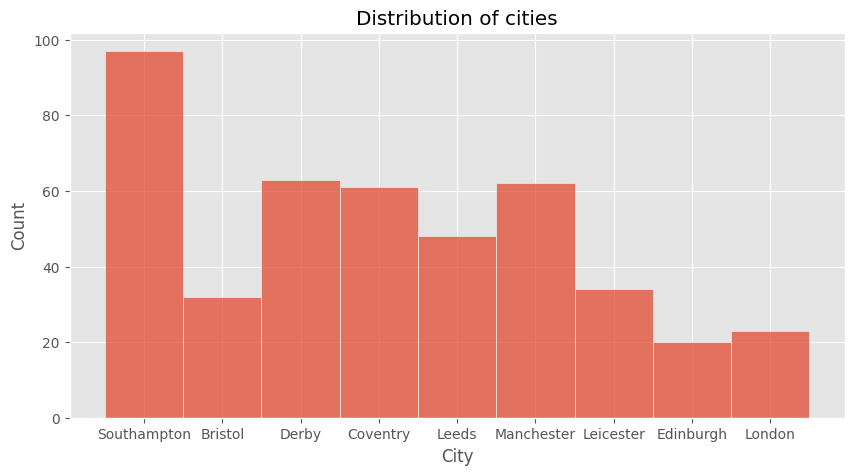

In [142]:
plt.figure(figsize=(10,5))
sns.histplot(data_pol["City"])
plt.title("Distribution of cities")

In [143]:
min_occurrences = min(data_pol['City'].value_counts()[cities])

undersampled_data_pol = pd.concat([
    data_pol[data_pol['City'] == city].sample(min_occurrences, replace=False) 
    for city in cities
 ])

After the application of undersampling

Text(0.5, 1.0, 'Distribution of cities')

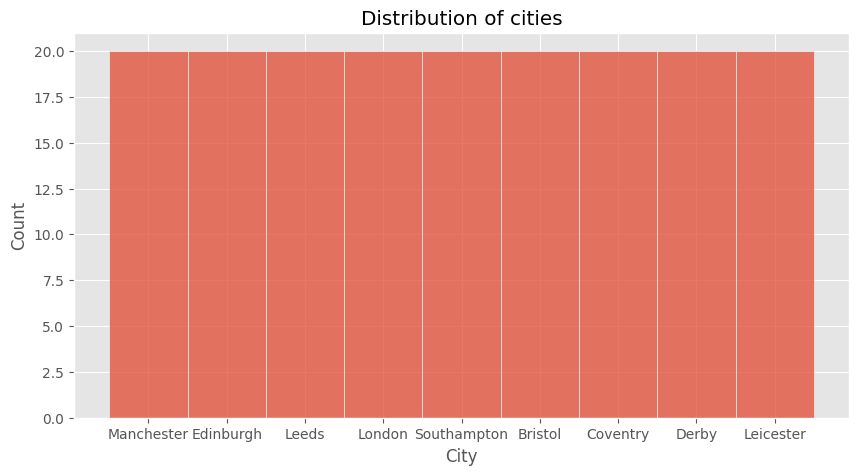

In [144]:
plt.figure(figsize=(10,5))
sns.histplot(undersampled_data_pol["City"])
plt.title("Distribution of cities")

In [145]:
label_encoder = LabelEncoder()

undersampled_data_pol["pollutant"] = label_encoder.fit_transform(undersampled_data_pol["pollutant"])


As we already discussed before, the normalization step is really important so we will do it . Z-score will be applied individually over every pollutant.

In [146]:
undersampled_data_pol_final = undersampled_data_pol.iloc[:,0:2]
undersampled_data_pol_final['emissions_normalized'] = undersampled_data_pol_final.groupby('pollutant')['emissions'].transform(lambda x: (x -x.mean()) / x.std())
undersampled_data_pol_final.drop(columns=['emissions'], inplace=True)
undersampled_data_pol_final=undersampled_data_pol_final.rename(columns={'emissions_normalized':'emissions'})


In [147]:
undersampled_data_pol_final= pd.concat([undersampled_data_pol_final,undersampled_data_pol["City"]],axis=1)
undersampled_data_pol_final

pollutant  emissions        City
305426          3   0.669794  Manchester
291009          7  -0.636450  Manchester
308281          7   0.675081  Manchester
320755          5   2.507167  Manchester
315785         13  -0.707107  Manchester
...           ...        ...         ...
314675         11  -0.041621   Leicester
317222         11  -0.172366   Leicester
316259          6  -0.377711   Leicester
291042          7   3.000067   Leicester
299832          3  -0.713279   Leicester

[180 rows x 3 columns]

In [148]:
undersampled_data_pol_final = undersampled_data_pol_final.dropna(subset=['emissions'])

undersampled_data_pol_final.reset_index(drop=True, inplace=True)
undersampled_data_pol_final

pollutant  emissions        City
0            3   0.669794  Manchester
1            7  -0.636450  Manchester
2            7   0.675081  Manchester
3            5   2.507167  Manchester
4           13  -0.707107  Manchester
..         ...        ...         ...
173         11  -0.041621   Leicester
174         11  -0.172366   Leicester
175          6  -0.377711   Leicester
176          7   3.000067   Leicester
177          3  -0.713279   Leicester

[178 rows x 3 columns]

#### K-Means

We can infer from this plot that there are three clusters that are highly explicable and that indicate certain patterns in our data. 

Silhouette Score: 0.5760008862605173


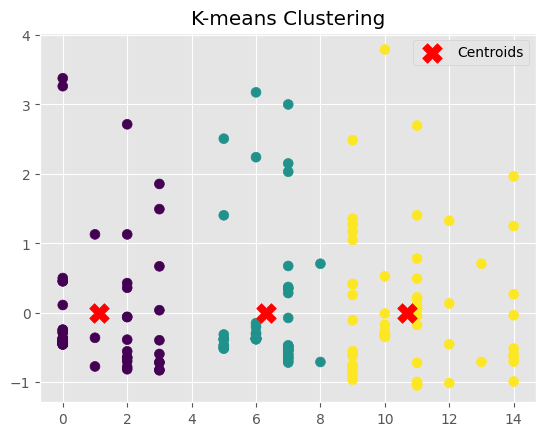

In [149]:
k_data = undersampled_data_pol_final.iloc[:, 0:2]

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(k_data)

centers = kmeans.cluster_centers_
labels = kmeans.labels_

undersampled_data_pol_final = undersampled_data_pol_final.copy()
undersampled_data_pol_final['Cluster'] = labels

silhouette_avg = silhouette_score(k_data, labels)
print(f"Silhouette Score: {silhouette_avg}")

plt.scatter(k_data.iloc[:, 0], k_data.iloc[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title('K-means Clustering')
plt.legend()
plt.show()


Since our objective is to examine regional pollution patterns, we will assume that cities within the same cluster will exhibit similar patterns of behavior. If the majority of the examples point to a particular cluster, we will consider a city to be a member of that cluster.  

- Southampton, Leeds are in Cluster 0; 
- Edingburgh is in Cluster 1; 
- Manchester, Bristol, and Leicester are in Cluster 2.

Taking into account that cities from different region belong to the same cluster, it can be inferred that there are differences in patterns between the cities in the same region.


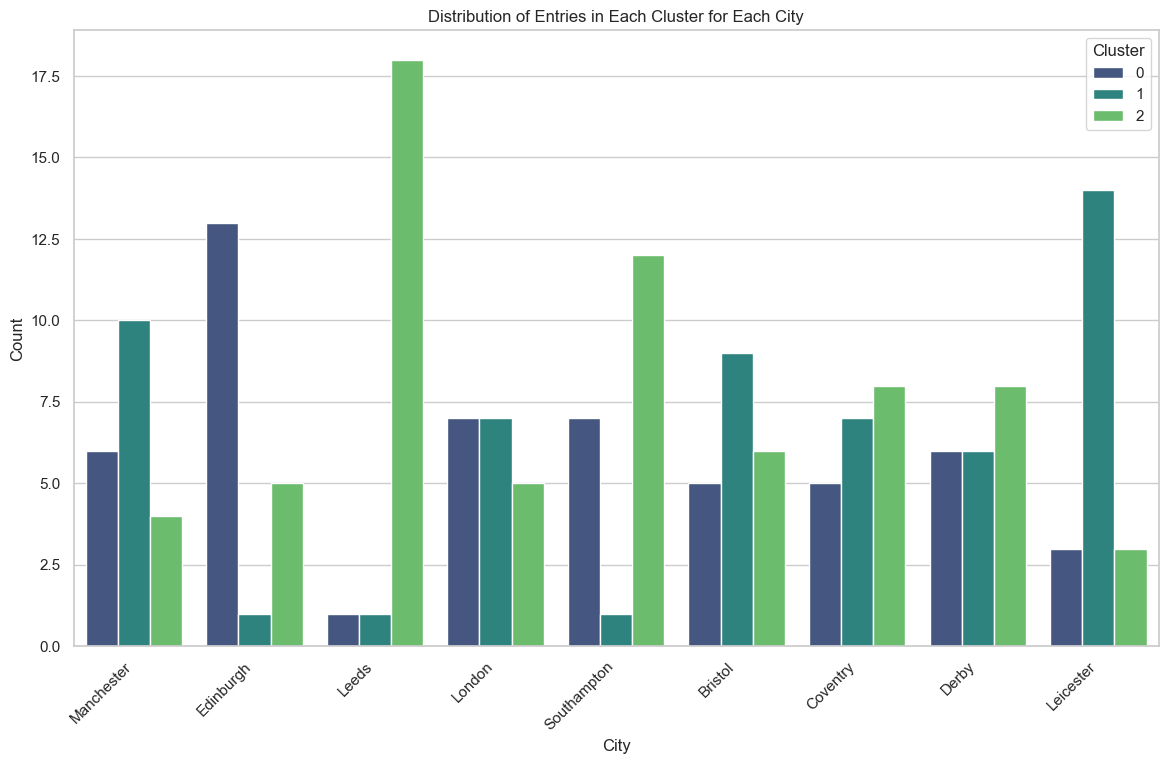

In [150]:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

undersampled_data_pol_final.loc[:,'Cluster'] = undersampled_data_pol_final.loc[:,'Cluster'].astype(str)

sns.countplot(x='City', hue='Cluster', data=undersampled_data_pol_final, palette='viridis')
plt.title('Distribution of Entries in Each Cluster for Each City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.legend(title='Cluster', loc='upper right')
plt.show()

## Some Conclusions

At the end, it was possible to obtain a good amount of information, however, due to the small amount of data the results cannot be trsuted 100%. In this section we will make a brief overview of those conclusions .

- Respiratory conditions are mainly provoked by pm10 and is benefited by air pollution and they are increasing in the most recent years. It's unknown what are the air components that define "air pollution",so , pm10 might not be included alongside with other key components to respiratory problems.
- Ammonia and methane contribute to cancer rate.
- Air pollution is correlated with traffic flow, as expected, and motor vehicles contribute a lot to the methane emissions. We can notice low levels of air pollution and traffic flow in the most recent years, probably due to the pandemic situation.
- The region is does not define the pollution patterns in England.

In short, the exploratory data analysis could answer some assumptions made intuitively and confirm them using various techniques, that were able to withdraw all the inforamtion needed form the data

## 3 - Machine learning algorithms application

### Linear Regression
A basic statistical technique for simulating the relationship between a dependent variable and one or more independent variables is called linear regression. It makes the assumption that there is a linear relationship between changes in the independent variables and a consistent change in the dependent variable.
To put it another way, linear regression enables us to comprehend how changes in one or more independent variables affect the value of the dependent variable. For this reason, we will use this method to draw some conclusions about our data.

We choose our target and the variables.
The variables are chosen accordingly to the analysis made in EDA,i.e., the most correlated variables with traffc flow, which is our target variable, what we are trying to predict

In [151]:
flow_pred = data2.drop(columns=['PM10 Air','Nitrogen oxides (NOX)','NO2 Air'])
flow_pred.head(2)

all_motor_vehicles   SO2 Air  Ammonia (NH3)  Sulphur oxides (SOX)  \
Year                                                                      
2007            1.513797 -0.493381      -0.018860             -0.371466   
2008            1.604308 -0.775690       1.343575             -0.664205   

      Methane (CH4)  
Year                 
2007       1.427612  
2008       1.110478

In [152]:
y = flow_pred.loc[:,"all_motor_vehicles"]
X = flow_pred.drop(columns = ["all_motor_vehicles"])
print(str(X.shape[0])+"x"+str(X.shape[1]))


15x4


Even though we knew our data was insufficient to train the model, we nonetheless utilized train-test split to split it into 80% train and 20% test.  
Being the test data never used for training

In [153]:
from sklearn.model_selection import train_test_split,KFold

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=0,shuffle=True)
X_train.shape

(12, 4)

This sample demonstrates 4-fold cross-validation to train a  linear regression model. The graphical display of loss over epochs facilitates comprehension of the learning dynamics of the model and its performance at various dataset folds.  
It's possible to see that the loss function of the train data converges, so the number of epochs is enough.
 

2024-01-15 13:47:21.604110: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-15 13:47:21.604249: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-15 13:47:21.697936: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-15 13:47:21.854298: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-15 13:47:23.682374: W tensorflow/compiler/tf2

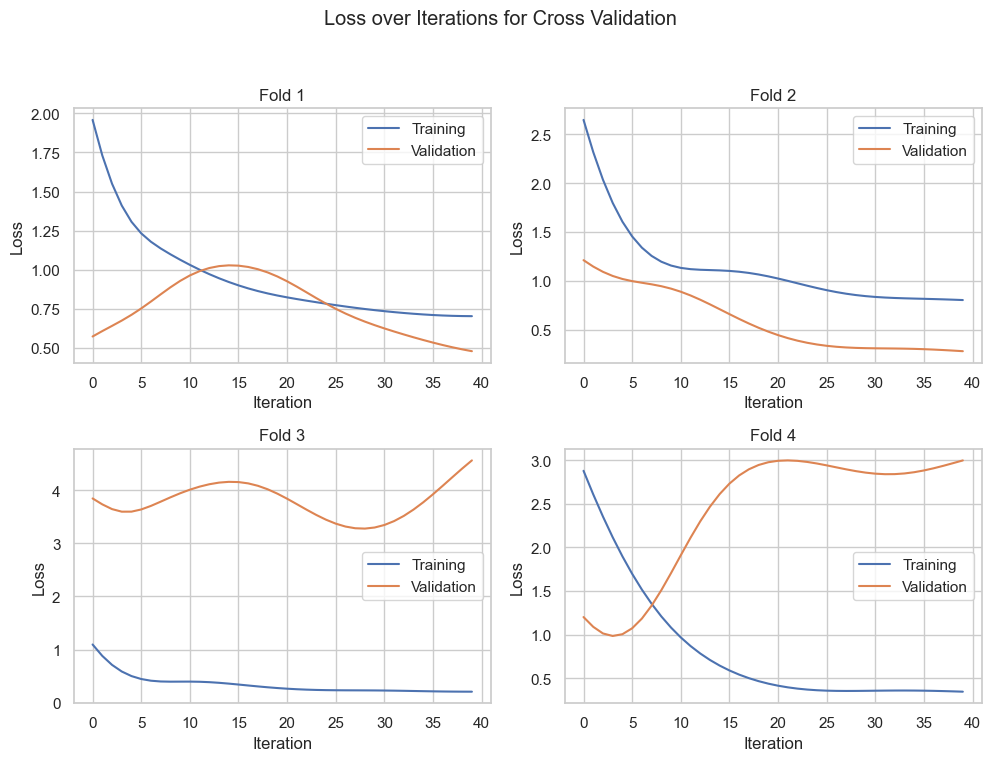

In [154]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold


kf = KFold(n_splits=4, shuffle=True, random_state=42)
thetas = []
loss_values = []
mse_train = []
mse_val = []  # List to store validation loss for each fold
models = []

for train_index, val_index in kf.split(X_train):
    X_train_cv = X_train[train_index, :]
    y_train_cv = y_train[train_index]
    X_val_cv = X_train[val_index, :]
    y_val_cv = y_train[val_index]

    model = Sequential([
        Dense(units=1, input_shape=(X_train.shape[1],), activation='linear')
    ])

    model.compile(optimizer=Adam(learning_rate=0.05), loss='mean_squared_error')

    history = model.fit(X_train_cv, y_train_cv, epochs=40, verbose=0, validation_data=(X_val_cv, y_val_cv))
    
    models.append(model)

    loss_values.append(history.history['loss'])
    mse_val.append(history.history['val_loss'])

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].plot(loss_values[0], label='Training')
axs[0, 0].plot(mse_val[0], label='Validation')
axs[0, 0].legend()
axs[0, 0].set_title('Fold 1')
axs[0, 0].set_xlabel('Iteration')
axs[0, 0].set_ylabel('Loss')

axs[0, 1].plot(loss_values[1], label='Training')
axs[0, 1].plot(mse_val[1], label='Validation')
axs[0, 1].legend()
axs[0, 1].set_title('Fold 2')
axs[0, 1].set_xlabel('Iteration')
axs[0, 1].set_ylabel('Loss')

axs[1, 0].plot(loss_values[2], label='Training')
axs[1, 0].plot(mse_val[2], label='Validation')
axs[1, 0].legend()
axs[1, 0].set_title('Fold 3')
axs[1, 0].set_xlabel('Iteration')
axs[1, 0].set_ylabel('Loss')

axs[1, 1].plot(loss_values[3], label='Training')
axs[1, 1].plot(mse_val[3], label='Validation')
axs[1, 1].legend()
axs[1, 1].set_title('Fold 4')
axs[1, 1].set_xlabel('Iteration')
axs[1, 1].set_ylabel('Loss')

plt.suptitle('Loss over Iterations for Cross Validation')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



We have now made the decision to investigate various regularization values (alpha) to enhance the functionality of our linear regression model.  The best regularization strength that avoids overfitting and enhances generalization can be determined by analyzing the data.

In [155]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import KFold
regs= [0,0.0001, 0.001, 0.01, 0.1, 1.0,1.5,2,2.5,3]

models = []
loss_val = []
loss_train =  []
for reg in regs:
    kf = KFold(n_splits=4, shuffle=True, random_state=42)
    thetas = []
    loss_values = []
    mse_train = 0
    mse_val = []  # List to store validation loss for each fold

    mse = 0
    for train_index, val_index in kf.split(X_train):
        X_train_cv = X_train[train_index, :]
        y_train_cv = y_train[train_index]
        X_val_cv = X_train[val_index, :]
        y_val_cv = y_train[val_index]

        model = Sequential([
            Dense(units=1, input_shape=(X_train.shape[1],), activation='linear',kernel_regularizer=l2(reg))
        ])

        model.compile(optimizer=Adam(learning_rate=0.05), loss='mean_squared_error')

        history = model.fit(X_train_cv, y_train_cv, epochs=40, verbose=0, validation_data=(X_val_cv, y_val_cv))
        
       
        loss_values.append(history.history['loss'])
        mse_val.append(history.history['val_loss'])
        mse_train+=history.history['loss'][-1]
        mse += history.history['val_loss'][-1]
    loss_train.append(mse_train/4)
    models.append(model)
    mean_error = mse/4
    loss_val.append(mean_error)

Finding the regularization strength that strikes the greatest balance between model complexity and generalization performance can be aided by this figure.  
As we see, the best value of alpha is 2, because it demonstrates the best validation loss


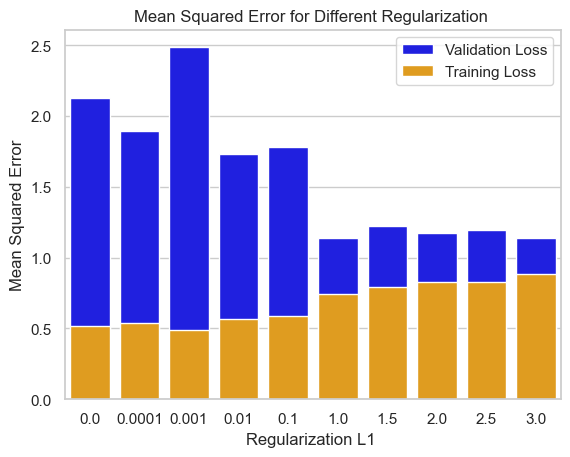

In [156]:
sns.barplot(x=regs, y=loss_val, color='blue', label='Validation Loss')
sns.barplot(x=regs, y=loss_train, color='orange', label='Training Loss')
plt.xlabel('Regularization L1 ')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error for Different Regularization ')
plt.legend()
plt.show()

We make again the plot for the loss about each fold, but now to decide which one of folds presents better performance.  
We choose the model with the lowest validation loss function during the model selection procedure, paying particular attention to the outcomes of the first fold. This decision guarantees that the model of choice performs better in terms of reducing prediction errors and transferring well to new data.

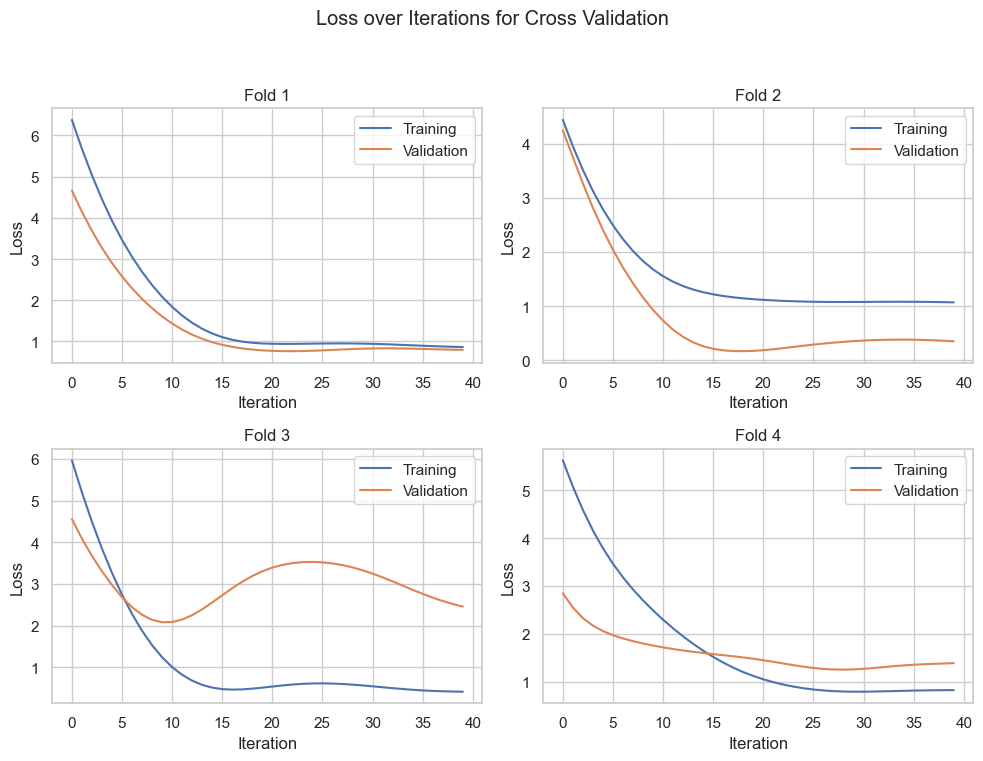

In [157]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold


kf = KFold(n_splits=4, shuffle=True, random_state=42)
thetas = []
loss_values = []
mse_train = []
mse_val = []  # List to store validation loss for each fold
models = []

for train_index, val_index in kf.split(X_train):
    X_train_cv = X_train[train_index, :]
    y_train_cv = y_train[train_index]
    X_val_cv = X_train[val_index, :]
    y_val_cv = y_train[val_index]

    model = Sequential([
        Dense(units=1, input_shape=(X_train.shape[1],), activation='linear',kernel_regularizer=l2(2))
    ])

    model.compile(optimizer=Adam(learning_rate=0.05), loss='mean_squared_error')

    history = model.fit(X_train_cv, y_train_cv, epochs=40, verbose=0, validation_data=(X_val_cv, y_val_cv))
    
    models.append(model)

    loss_values.append(history.history['loss'])
    mse_val.append(history.history['val_loss'])


fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].plot(loss_values[0], label='Training')
axs[0, 0].plot(mse_val[0], label='Validation')
axs[0, 0].legend()
axs[0, 0].set_title('Fold 1')
axs[0, 0].set_xlabel('Iteration')
axs[0, 0].set_ylabel('Loss')

axs[0, 1].plot(loss_values[1], label='Training')
axs[0, 1].plot(mse_val[1], label='Validation')
axs[0, 1].legend()
axs[0, 1].set_title('Fold 2')
axs[0, 1].set_xlabel('Iteration')
axs[0, 1].set_ylabel('Loss')

axs[1, 0].plot(loss_values[2], label='Training')
axs[1, 0].plot(mse_val[2], label='Validation')
axs[1, 0].legend()
axs[1, 0].set_title('Fold 3')
axs[1, 0].set_xlabel('Iteration')
axs[1, 0].set_ylabel('Loss')

axs[1, 1].plot(loss_values[3], label='Training')
axs[1, 1].plot(mse_val[3], label='Validation')
axs[1, 1].legend()
axs[1, 1].set_title('Fold 4')
axs[1, 1].set_xlabel('Iteration')
axs[1, 1].set_ylabel('Loss')

plt.suptitle('Loss over Iterations for Cross Validation')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



Even though the loss is low with this regularization, the model performs very poorly, the model is too bias, so we will a try a regularization with better training loss, or better saying, we will not use regularization (alpha = 0)

1/1 [==============================] - 0s 56ms/step


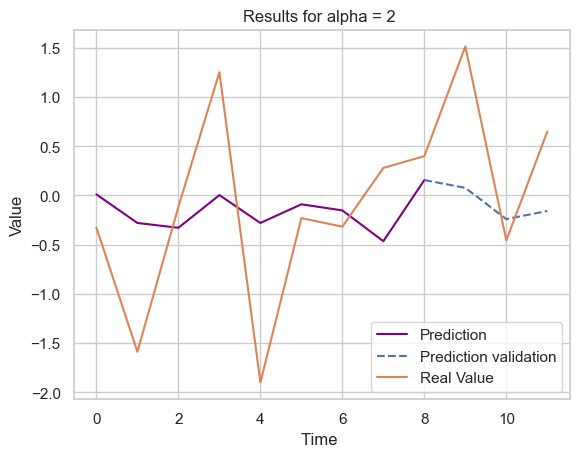

In [158]:
pred = models[0].predict(X_train)
plt.plot(list(range(0,len(pred[:-3]))),pred[:-3],label="Prediction",color = "purple")
plt.plot(list(range(len(pred[:-4]),len(pred))),pred[-4:],label="Prediction validation",linestyle = "--")
plt.plot(y_train,label="Real Value")
plt.xlabel('Time ')
plt.ylabel('Value')
plt.title('Results for alpha = 2 ')
plt.legend()
plt.show()

 Like we said previous We choose the model with the lowest validation loss function during the model selection procedure, paying particular attention to the outcomes of the first fold. 

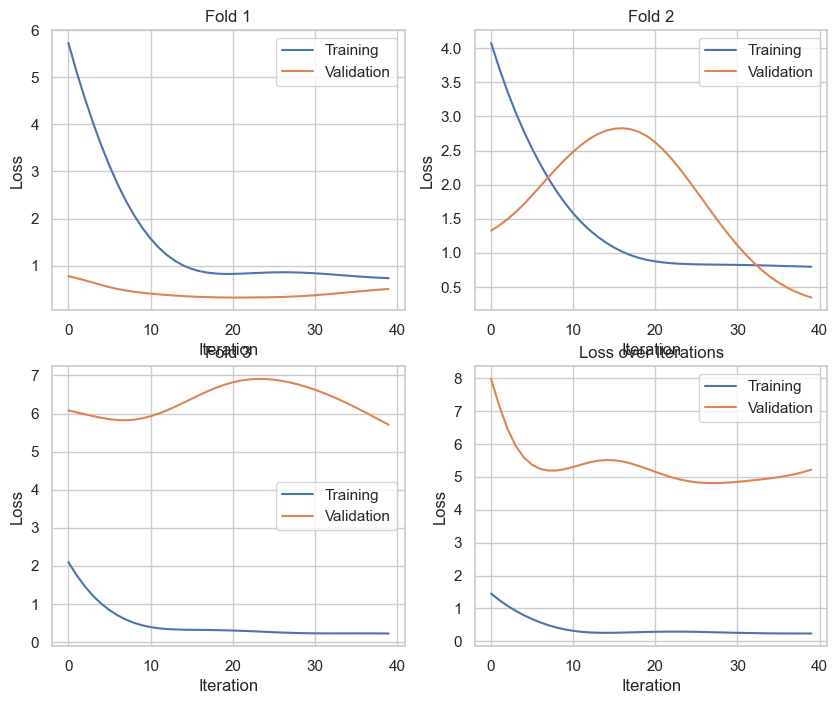

In [159]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold


kf = KFold(n_splits=4, shuffle=True, random_state=42)
thetas = []
loss_values = []
mse_train = []
mse_val = []  # List to store validation loss for each fold
models = []

for train_index, val_index in kf.split(X_train):
    X_train_cv = X_train[train_index, :]
    y_train_cv = y_train[train_index]
    X_val_cv = X_train[val_index, :]
    y_val_cv = y_train[val_index]

    model = Sequential([
        Dense(units=1, input_shape=(X_train.shape[1],), activation='linear',kernel_regularizer=l2(0))
    ])

    model.compile(optimizer=Adam(learning_rate=0.05), loss='mean_squared_error')

    history = model.fit(X_train_cv, y_train_cv, epochs=40, verbose=0, validation_data=(X_val_cv, y_val_cv))
    
    models.append(model)

    loss_values.append(history.history['loss'])
    mse_val.append(history.history['val_loss'])

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].plot(loss_values[0], label='Training')
axs[0, 0].plot(mse_val[0], label='Validation')
axs[0, 0].legend()
axs[0, 0].set_title('Fold 1')
axs[0, 0].set_xlabel('Iteration')
axs[0, 0].set_ylabel('Loss')

axs[0, 1].plot(loss_values[1], label='Training')
axs[0, 1].plot(mse_val[1], label='Validation')
axs[0, 1].legend()
axs[0, 1].set_title('Fold 2')
axs[0, 1].set_xlabel('Iteration')
axs[0, 1].set_ylabel('Loss')

axs[1, 0].plot(loss_values[2], label='Training')
axs[1, 0].plot(mse_val[2], label='Validation')
axs[1, 0].legend()
axs[1, 0].set_title('Fold 3')
axs[1, 0].set_xlabel('Iteration')
axs[1, 0].set_ylabel('Loss')

axs[1, 1].plot(loss_values[3], label='Training')
axs[1, 1].plot(mse_val[3], label='Validation')
axs[1, 1].legend()
axs[1, 1].set_title('Fold 4')
axs[1, 1].set_xlabel('Iteration')
axs[1, 1].set_ylabel('Loss')

plt.title('Loss over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()


We can see a better perform by the model now. The prediction it's now close to real value.

1/1 [==============================] - 0s 40ms/step


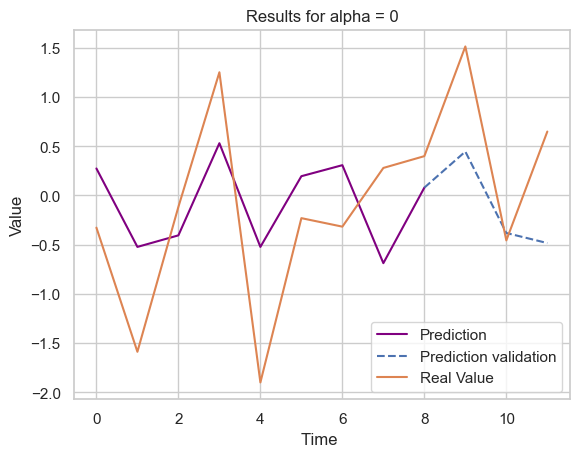

In [160]:
pred = models[0].predict(X_train)
plt.plot(list(range(0,len(pred[:-3]))),pred[:-3],label="Prediction",color = "purple")
plt.plot(list(range(len(pred[:-4]),len(pred))),pred[-4:],label="Prediction validation",linestyle = "--")
plt.plot(y_train,label="Real Value")
plt.xlabel('Time ')
plt.ylabel('Value')
plt.title('Results for alpha = 0')
plt.legend()
plt.show()

This is the final figure, where we check if our predictions are close to test data.  
We can conlude an acceptable performance by the model, having difficulties predicting peaks


1/1 [==============================] - 0s 14ms/step


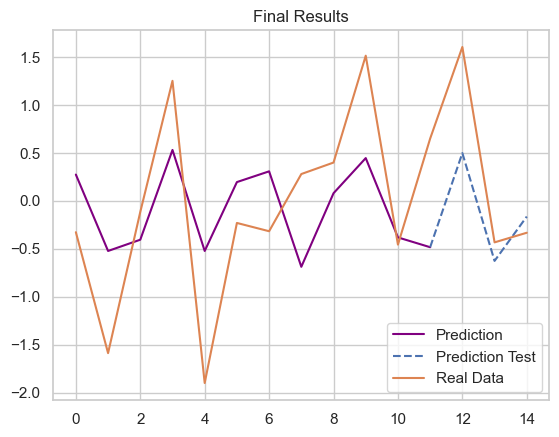

In [161]:
X_pred = np.array(list(X_train) + list(X_test))
pred = models[0].predict(X_pred)
plt.plot(list(range(0,len(pred[:-3]))),pred[:-3],label="Prediction",color = "purple")
plt.plot(list(range(len(pred[:-4]),len(pred))),pred[-4:],label="Prediction Test",linestyle = "--")
plt.plot(list(y_train) +list(y_test),label="Real Data")
plt.title("Final Results")
plt.legend()

### Long Short-Term Memory (LSTM)
Recurrent neural network (RNN) architecture known as Long Short-Term Memory (LSTM) was created to solve the vanishing gradient issue, which frequently arises with conventional RNNs. Since their introduction, long-term dependencies in sequential data have been effectively captured and remembered thanks to LSTMs.
And we also choose to apply LSTM to our data in order to forecast values. 

In this section we are going through the same process as in Linear Regression, but this time we won't have any inforamtion in our test data,i.e, we will have to apply a machine learning model that relies on time context.  
The variables are the same as in the section before, but this time, traffic flow will be use as training feature and target. 

In [162]:
X_lstm= data2.drop(columns=['PM10 Air','Nitrogen oxides (NOX)','NO2 Air'])

y_lstm = flow_pred.loc[:,"all_motor_vehicles"]

print(str(X_lstm.shape[0])+"x"+str(X_lstm.shape[1]))



15x5


We split the data 60% of the data were used for training, 20% were for testing, and 20% were for validation.

In [163]:
X_train1_lstm, X_test_lstm, y_train1_lstm, y_test_lstm = train_test_split(X_lstm.values, y_lstm.values, test_size=0.2, random_state=0,shuffle=False)
X_train_lstm, X_val_lstm, y_train_lstm, y_val_lstm = train_test_split(X_train1_lstm, y_train1_lstm, test_size=0.2, random_state=0,shuffle=False)

LSTM needs a context to work, i.e., we need sequences of numbers. For exemple the first training example is [1, 2, 3] and we want to predict [4] the second is [2, 3, 4] and we want to predict [5] etc...  
The length of those examples are called lag, which is separation between the training and the output.


In [164]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_features = 5
lag = 3
generator = TimeseriesGenerator(X_train_lstm,y_train_lstm,length = lag,batch_size=1)

In [165]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model = Sequential()
model.add(LSTM(100,activation = 'relu',input_shape = (lag,n_features)))
model.add(Dense(1))
model.compile(optimizer="adam",loss = 'mse')

In [166]:
history = model.fit(generator,epochs=20)

Epoch 1/20


6/6 [==============================] - 1s 3ms/step - loss: 0.1396
Epoch 2/20
6/6 [==============================] - 0s 3ms/step - loss: 0.0989
Epoch 3/20
6/6 [==============================] - 0s 2ms/step - loss: 0.0724
Epoch 4/20
6/6 [==============================] - 0s 3ms/step - loss: 0.0508
Epoch 5/20
6/6 [==============================] - 0s 3ms/step - loss: 0.0368
Epoch 6/20
6/6 [==============================] - 0s 2ms/step - loss: 0.0228
Epoch 7/20
6/6 [==============================] - 0s 3ms/step - loss: 0.0139
Epoch 8/20
6/6 [==============================] - 0s 2ms/step - loss: 0.0092
Epoch 9/20
6/6 [==============================] - 0s 3ms/step - loss: 0.0071
Epoch 10/20
6/6 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 11/20
6/6 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 12/20
6/6 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 13/20
6/6 [==============================] - 0s 4ms/step - loss: 0.0019
Epoch 

The loss of our model, and we can see it converging, thus we don't need more epochs

Text(0, 0.5, 'Loss')

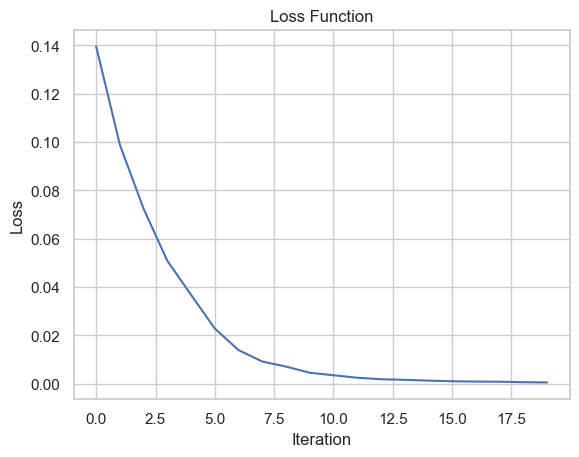

In [167]:
plt.plot(history.history["loss"])
plt.title("Loss Function")
plt.xlabel('Iteration')
plt.ylabel('Loss')

The purpose of this visualization is to assess how well the model predicts the actual values found in the training dataset with TimeseriesGenerator that is used to create batches of temporal data for prediction.This facilitates evaluating how well the model captures the underlying patterns in the time series data.



9/9 [==============================] - 0s 2ms/step


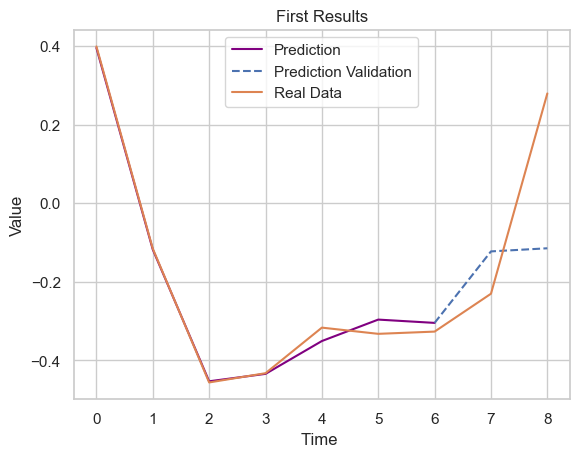

In [168]:
predict_batch = TimeseriesGenerator(X_train1_lstm,y_train1_lstm,length = lag,batch_size=1)
pred = model.predict(predict_batch)
plt.plot(list(range(0,len(pred[:-3])+1)),pred[:-2],label="Prediction",color = "purple")
plt.plot(list(range(len(pred[:-3]),len(pred))),pred[-3:],label="Prediction Validation",linestyle = "--")
plt.plot(y_train1_lstm[3:],label="Real Data")

plt.xlabel('Time ')
plt.ylabel('Value')
plt.title('First Results')
plt.legend()
plt.show()

In [169]:
from sklearn.metrics import mean_squared_error

mse_list = []
models = []
for k in [1,2,3,4,5,6]:
    generator = TimeseriesGenerator(X_train_lstm,y_train_lstm,length = k,batch_size=1)
    model = Sequential()
    model.add(LSTM(100,activation = 'relu',input_shape = (k,n_features)))
    model.add(Dense(1))
    model.compile(optimizer="adam",loss = 'mse')
    history = model.fit(generator,epochs=20,verbose=0)
    predict_batch = TimeseriesGenerator(X_train1_lstm,y_train1_lstm,length = lag,batch_size=1)
    models.append(model)
    pred = model.predict(predict_batch)
    mse = mean_squared_error(y_val_lstm, pred[-3:])
    mse_list.append(mse)

9/9 [==============================] - 0s 1ms/step


This figure allows predictions from various models with different lag values to be compared side by side. Every subplot has a distinct lag value associated with it.

Our selection criterion for LSTM models is based on the model that produces the highest accurate predictions, Lag = 3. To be more precise, we select the model with the best predictive performance that is, one that produces the best projections. 

9/9 [==============================] - 0s 1ms/step


9/9 [==============================] - 0s 1ms/step


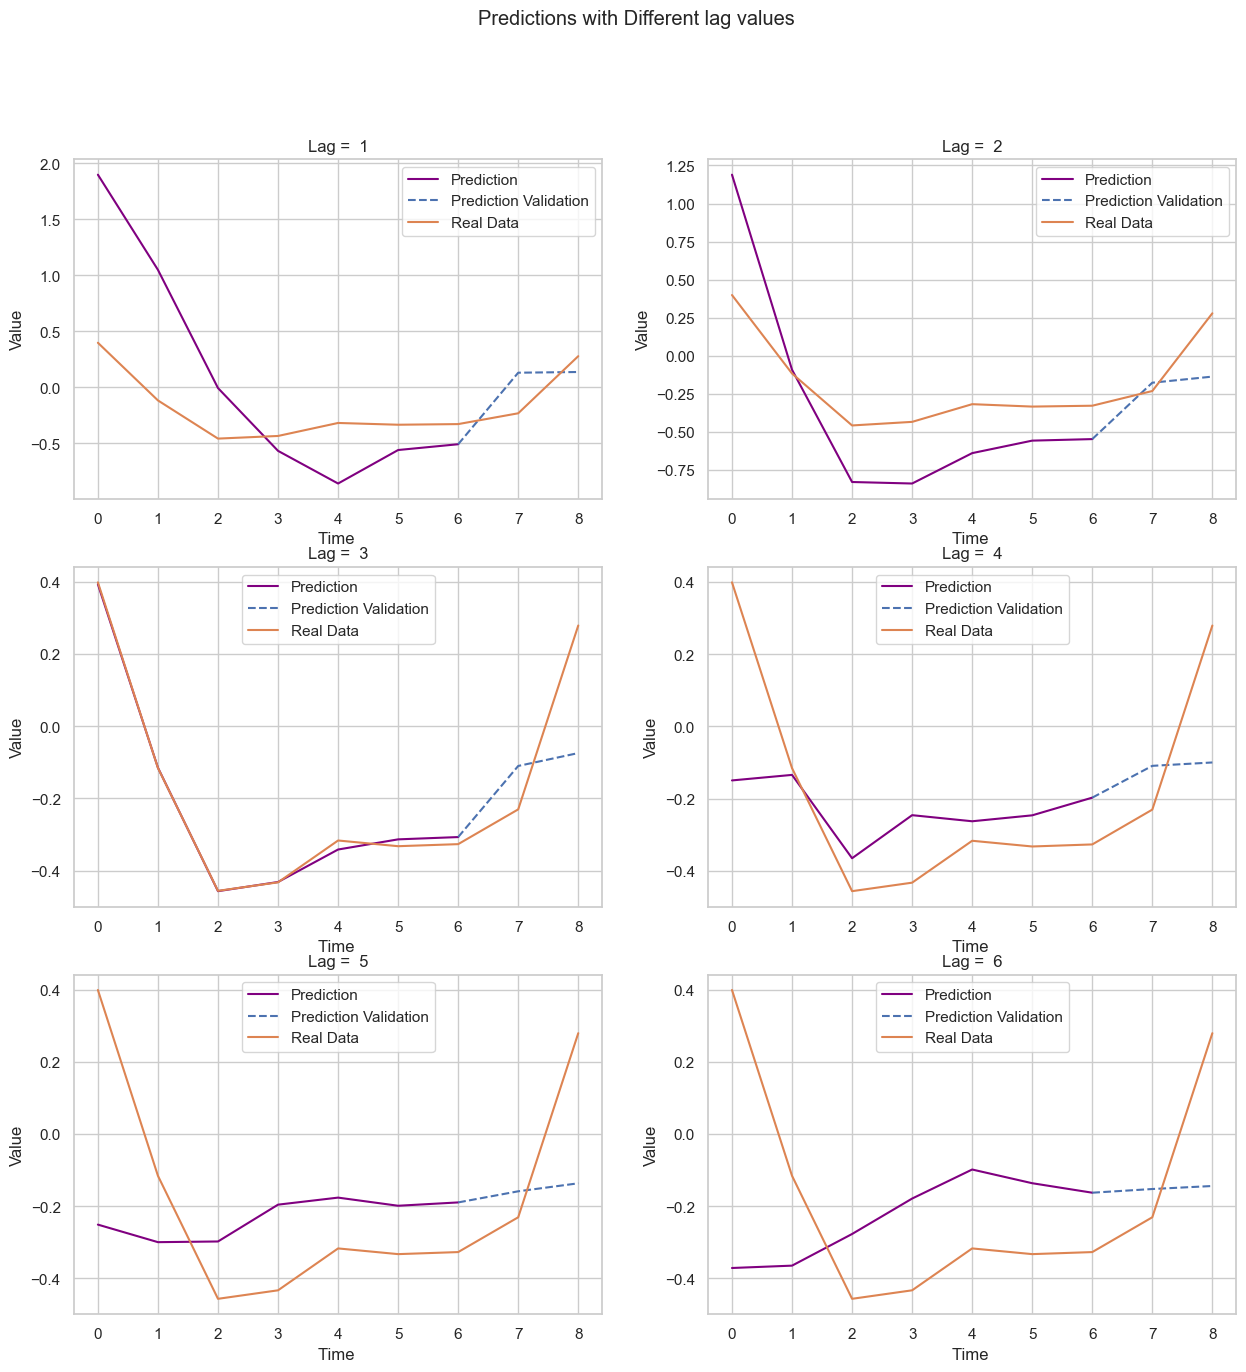

In [170]:
import matplotlib.pyplot as plt

# Assuming models is a list containing all the trained models
num_models = len(models)
num_rows = 3  # Change as needed
num_cols = (num_models + num_rows - 1) // num_rows

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for i, model in enumerate(models):
    row = i // num_cols
    col = i % num_cols

    predict_batch = TimeseriesGenerator(X_train1_lstm, y_train1_lstm, length=lag, batch_size=1)
    pred = model.predict(predict_batch)


    axs[row, col].plot(list(range(0,len(pred[:-3])+1)),pred[:-2],label="Prediction",color = "purple")
    axs[row, col].plot(list(range(len(pred[:-3]),len(pred))),pred[-3:],label="Prediction Validation",linestyle = "--")
    axs[row, col].plot(y_train1_lstm[3:],label="Real Data")
    axs[row, col].set_xlabel('Time ')
    axs[row, col].set_ylabel('Value')
   
   
    axs[row, col].set_title(f"Lag =  {i+1}")
    axs[row, col].legend()
# Adding labels and legend
fig.suptitle("Predictions with Different lag values")
plt.show()


Following this, we choose to repeatedly go through a list of various activation functions in order to determine which one performed the best in the plot behind

Choosing the activation function with the best performance is the main factor in our choice. More specifically, we give preference to the activation function known as the "relu" since it produces better model results.



In [171]:
from sklearn.metrics import mean_squared_error
activation_functions = ['sigmoid', 'tanh', 'relu', 'elu', 'selu', 'leaky_relu']
mse_list = []
models = []
generator = TimeseriesGenerator(X_train_lstm,y_train_lstm,length = 3,batch_size=1)
for k in activation_functions:
    
    model = Sequential()
    model.add(LSTM(100,activation = k,input_shape = (3,n_features)))
    model.add(Dense(1))
    model.compile(optimizer="adam",loss = 'mse')
    history = model.fit(generator,epochs=20,verbose=0)
    predict_batch = TimeseriesGenerator(X_train1_lstm,y_train1_lstm,length = lag,batch_size=1)
    models.append(model)
    pred = model.predict(predict_batch)
    mse = mean_squared_error(y_val_lstm, pred[-3:])
    mse_list.append(mse)

9/9 [==============================] - 0s 1ms/step


9/9 [==============================] - 0s 2ms/step


9/9 [==============================] - 0s 1ms/step


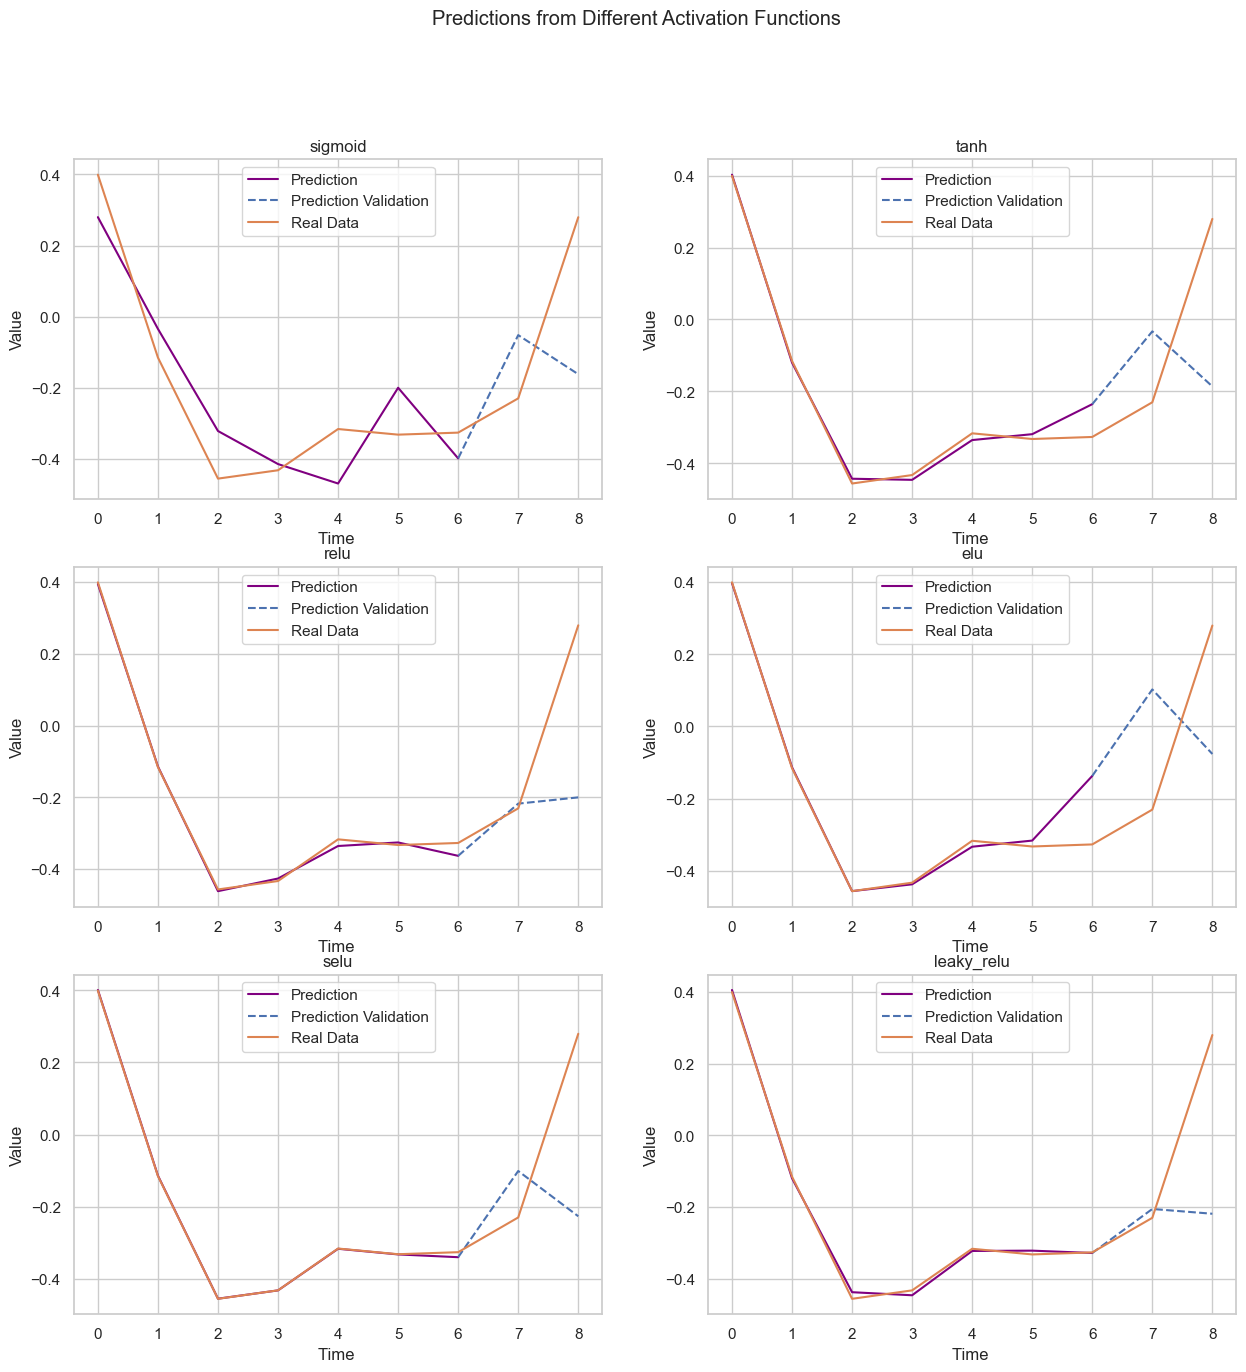

In [172]:
import matplotlib.pyplot as plt

# Assuming models is a list containing all the trained models
num_models = len(models)
num_rows = 3  # Change as needed
num_cols = (num_models + num_rows - 1) // num_rows

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for i, model in enumerate(models):
    row = i // num_cols
    col = i % num_cols

    predict_batch = TimeseriesGenerator(X_train1_lstm, y_train1_lstm, length=lag, batch_size=1)
    pred = model.predict(predict_batch)

    # Plotting predictions for each model in a separate subplot
    axs[row, col].plot(list(range(0,len(pred[:-3])+1)),pred[:-2],label="Prediction",color = "purple")
    axs[row, col].plot(list(range(len(pred[:-3]),len(pred))),pred[-3:],label="Prediction Validation",linestyle = "--")
    axs[row, col].plot(y_train1_lstm[3:],label="Real Data")
    axs[row, col].set_xlabel('Time ')
    axs[row, col].set_ylabel('Value')
   
    axs[row, col].set_title(f"{activation_functions[i]}")
    axs[row, col].legend()
# Adding labels and legend
fig.suptitle("Predictions from Different Activation Functions")
plt.show()


After that, we repeat this process using a list of several unit numbers to evaluate the plot's performance

Choosing the number of units with the best performance is the main factor in our choice and 200 units is better model results.



In [173]:
units_values = [50, 75, 100, 125, 150, 200]
models = []
mse_list = []
for k in units_values:
    
    model = Sequential()
    model.add(LSTM(k,activation = 'relu',input_shape = (3,n_features)))
    model.add(Dense(1))
    model.compile(optimizer="adam",loss = 'mse')
    history = model.fit(generator,epochs=20,verbose=0)
    predict_batch = TimeseriesGenerator(X_train1_lstm,y_train1_lstm,length = lag,batch_size=1)
    models.append(model)
    pred = model.predict(predict_batch)
    mse = mean_squared_error(y_val_lstm, pred[-3:])
    mse_list.append(mse)

9/9 [==============================] - 0s 1ms/step


1/9 [==>...........................] - ETA: 0s

9/9 [==============================] - 0s 1ms/step


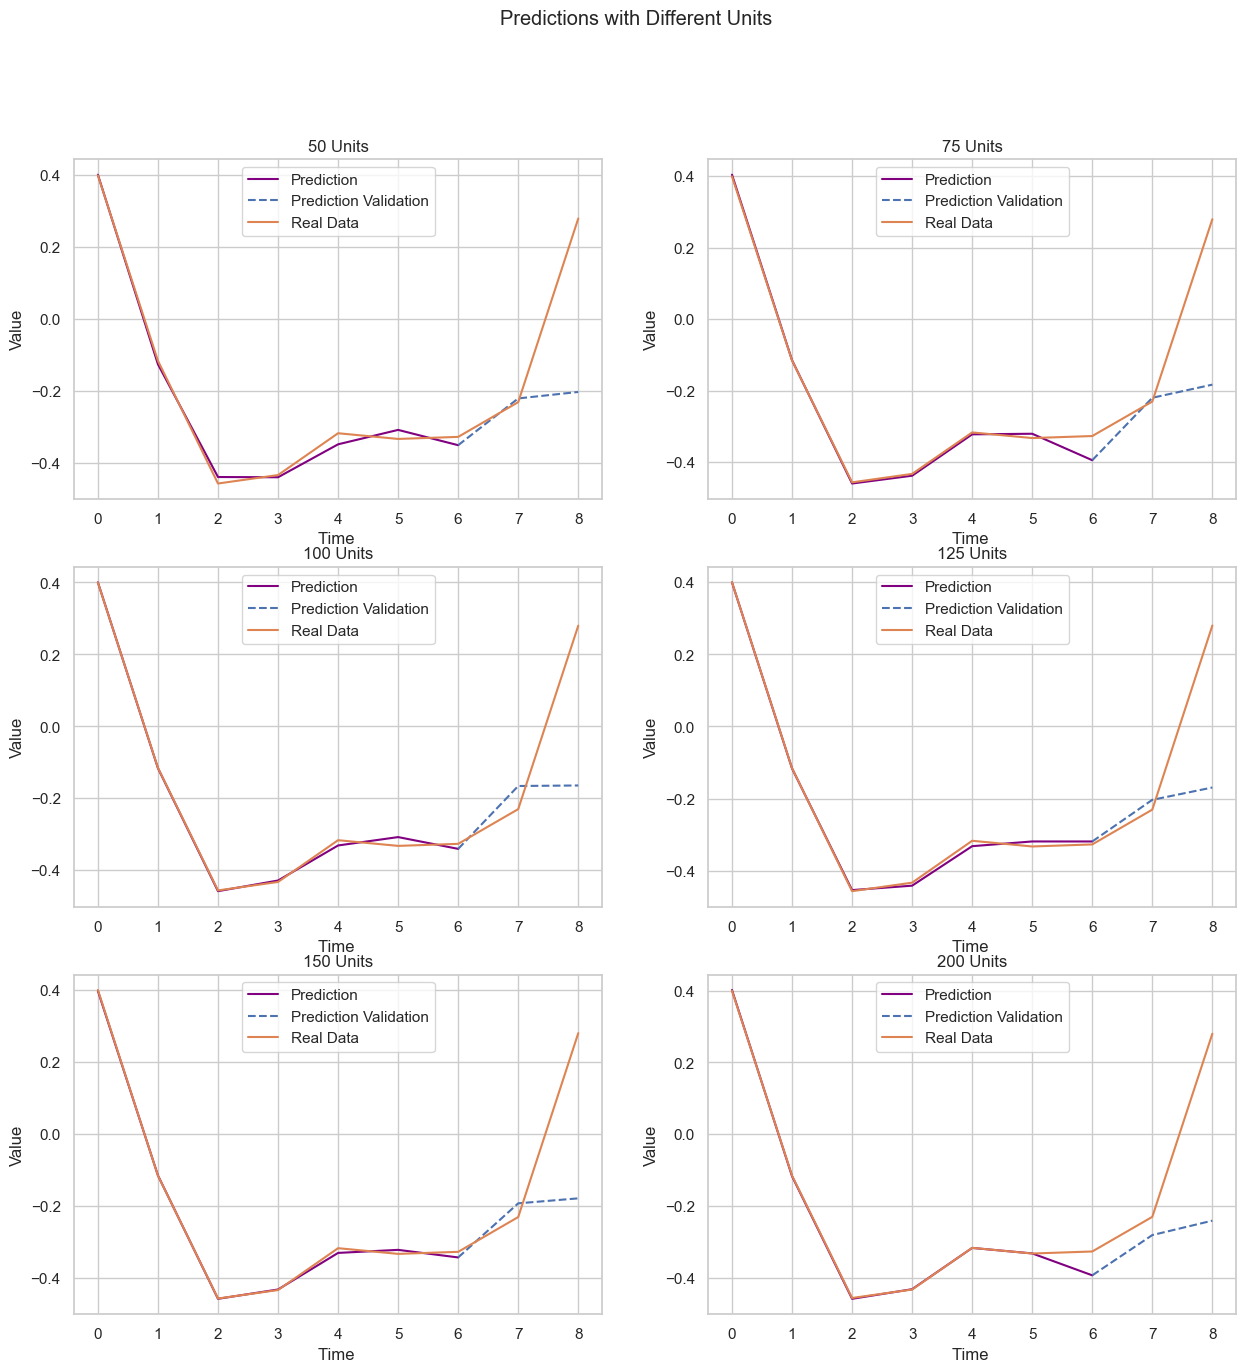

In [174]:
import matplotlib.pyplot as plt

# Assuming models is a list containing all the trained models
num_models = len(models)
num_rows = 3  # Change as needed
num_cols = (num_models + num_rows - 1) // num_rows

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for i, model in enumerate(models):
    row = i // num_cols
    col = i % num_cols

    predict_batch = TimeseriesGenerator(X_train1_lstm, y_train1_lstm, length=lag, batch_size=1)
    pred = model.predict(predict_batch)

    # Plotting predictions for each model in a separate subplot
    axs[row, col].plot(list(range(0,len(pred[:-3])+1)),pred[:-2],label="Prediction",color = "purple")
    axs[row, col].plot(list(range(len(pred[:-3]),len(pred))),pred[-3:],label="Prediction Validation",linestyle = "--")
    axs[row, col].plot(y_train1_lstm[3:],label="Real Data")
    axs[row, col].set_xlabel('Time ')
    axs[row, col].set_ylabel('Value')
   

    axs[row, col].set_title(f"{units_values[i]} Units")
    axs[row, col].legend()
# Adding labels and legend
fig.suptitle("Predictions with Different Units")
plt.show()


In [175]:
new_generator = TimeseriesGenerator(X_train1_lstm,y_train1_lstm,length = 3,batch_size=1)
model = Sequential()
model.add(LSTM(200,activation = 'relu',input_shape = (3,n_features)))
model.add(Dense(1))
model.compile(optimizer="adam",loss = 'mse')
history = model.fit(new_generator,epochs=20,verbose=0)
predict_batch = TimeseriesGenerator(X_train1_lstm,y_train1_lstm,length = lag,batch_size=1)
models.append(model)
pred = model.predict(predict_batch)
mse = mean_squared_error(y_val_lstm, pred[-3:])
mse_list.append(mse)

9/9 [==============================] - 0s 1ms/step


The model had big difiiculties predicting test data, but it's understandable, since the test data had a big negative peak.  
The model used for the final results learned with train+validation data to get more examples

12/12 [==============================] - 0s 2ms/step


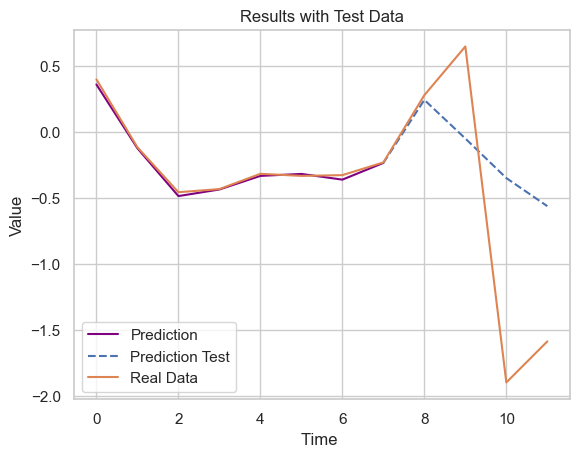

In [176]:
predict_batch = TimeseriesGenerator(X_lstm.values,y_lstm.values,length = 3,batch_size=1)
pred = model.predict(predict_batch)
plt.plot(list(range(0,len(pred[:-4]))),pred[:-4],label="Prediction",color = "purple")
plt.plot(list(range(len(pred[:-5]),len(pred))),pred[-5:],label="Prediction Test",linestyle = "--")
plt.plot(y_lstm.values[3:],label="Real Data")
plt.xlabel('Time ')
plt.ylabel('Value')
   
plt.title("Results with Test Data")
plt.legend()

### Improves and problems

With this study we lead with a tiny dataset that provides obstacles, such as limited information for our models to learn from, resulting to potential overfitting or underfitting issues. We focused on feature engineering as a tactic to enhance the dataset and boost model robustness in order to overcome these difficulties. We can add more features to our model in subsequent work to improve its performance.


### Conclusions about Machine Learning Models

In summary, considering the limitations of our tiny dataset, our machine learning models more especially, the Long Short-Term Memory (LSTM) and Linear Regression models—have shown respectable performance.

It is crucial to remember that the amount of our dataset naturally limits the efficacy of both models. A limited sample size increases the likelihood of overfitting to the training set and makes it harder to generalize to new cases, especially for LSTMs. The intricacy of the underlying relationships in the data may be too complex for the models to adequately represent, particularly when dealing with a variety of subtle patterns.

### About the work

We are happy with the results of our study, which have given us important new understandings of the patterns in our dataset. 
Through this endeavor, we were able to uncover unexpected intricacies in the data and corroborate several suspected trends. 
It has been a fascinating and illuminating experience to explore and manipulate the values. Our technical proficiency has increased as a result of this experience, but it has also increased our understanding of the complexity and potential of the data science field.



### References

[1] https://www.statology.org/what-is-a-strong-correlation/  

[2] Morgenthaler, S. (2009), Exploratory data analysis. WIREs Comp Stat, 1: 33-44  

[3] https://leanscape.io/data-distributions-explained-what-are-the-different-types-of-distribution/  

[4] PRINCIPAL COMPONENTS ANALYSIS (PCA) Steven M. Holland Department of Geology, University of Georgia, Athens, GA 30602-2501  

[5] https://medium.com/turing-talks/clustering-conceitos-b%C3%A1sicos-principais-algoritmos-e-aplica%C3%A7%C3%A3o-ace572a062a9                                     

[6] https://www.analyticsvidhya.com/blog/2021/10/everything-you-need-to-know-about-linear-regression/

[7] https://www.geeksforgeeks.org/deep-learning-introduction-to-long-short-term-memory/